# BI Project - Breast Cancer

## **Content of the Notebook**

Procedure according to CRISP-DM Framework.

The steps Data Understanding to Evaluation are illustrated in the notebook, all other contents are dealt with in the written elaboration.

- Business Understanding
- **Data Understanding**
- **Data Preperation**
- **Modeling**
- **Evaluation**
- Deployment Options & Future Outlook
- Conclusion



*The content and structure of the notebook, as well as definitions and explanations, are strongly based on the “Applied Analytics” course*

## Requirements ##
* pandas
* numpy==2.1, or else it is incompatible with shap
* matplotlib
* seaborn
* sklearn
* shap

In [1]:
# Read csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

df = pd.read_csv("data.csv")
    

## 1. Data Understanding

**Task:**
- Describe the dataset used
- Explore and describe features
- Discuss data quality (e.g., missing values)
- Highlight patterns or trends
- Include visualizations to support your data understanding


### Descriptive Statistics

Data Structure:

- 1 Table
- CSV-Format 
- Each feature has 2 linked/related features (except for the target variable and the ID) - e.g. the Radius variable has 3 columns: Mean, Standard Erros and Worst Radius



Data Content:
- Number of observations & variables
- Data types

In [2]:
# Create Overview
print("\nOverall Dataset Metrics:")
print(f"Total Entries: {len(df)}")
print(f"Total Features: {df.shape[1]}")
print(f"Features: {[col for col in df.columns]}")

# Remove "unnamed" column
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
print(f"Features: {[col for col in df.columns]}")


Overall Dataset Metrics:
Total Entries: 569
Total Features: 33
Features: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
Features: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symm

/var/folders/_5/hfhzj7597jv3nm3n2q1qq86h0000gn/T/ipykernel_57658/3204493115.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette=bar_colors)


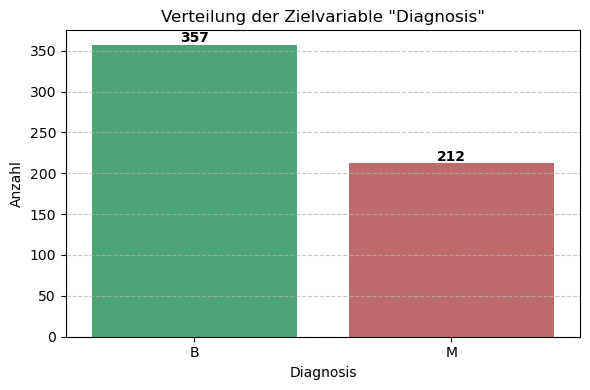

In [3]:
# Diagnose-Zählungen
diagnosis_counts = df['diagnosis'].value_counts().sort_index()

# Farbschema definieren (z. B. B = grün, M = rot)
color_map = {'B': 'mediumseagreen', 'M': 'indianred'}
bar_colors = [color_map[label] for label in diagnosis_counts.index]

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette=bar_colors)

# Titel und Achsen
plt.title('Verteilung der Zielvariable "Diagnosis"')
plt.xlabel('Diagnosis')
plt.ylabel('Anzahl')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Zahlen auf Balken
for i, v in enumerate(diagnosis_counts.values):
    ax.text(i, v + max(diagnosis_counts.values)*0.01, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Numerical/contiuos variables
- Distribution
- Min, Max, Mean, Median
- Standard Deviation
- Skewness
- Kurtosis


Descriptive Statistics:
                             Min       Max     Mean   Median  Std Dev  \
radius_mean                6.981    28.110   14.127   13.370    3.524   
texture_mean               9.710    39.280   19.290   18.840    4.301   
perimeter_mean            43.790   188.500   91.969   86.240   24.299   
area_mean                143.500  2501.000  654.889  551.100  351.914   
smoothness_mean            0.053     0.163    0.096    0.096    0.014   
compactness_mean           0.019     0.345    0.104    0.093    0.053   
concavity_mean             0.000     0.427    0.089    0.062    0.080   
concave points_mean        0.000     0.201    0.049    0.034    0.039   
symmetry_mean              0.106     0.304    0.181    0.179    0.027   
fractal_dimension_mean     0.050     0.097    0.063    0.062    0.007   
radius_se                  0.112     2.873    0.405    0.324    0.277   
texture_se                 0.360     4.885    1.217    1.108    0.552   
perimeter_se               

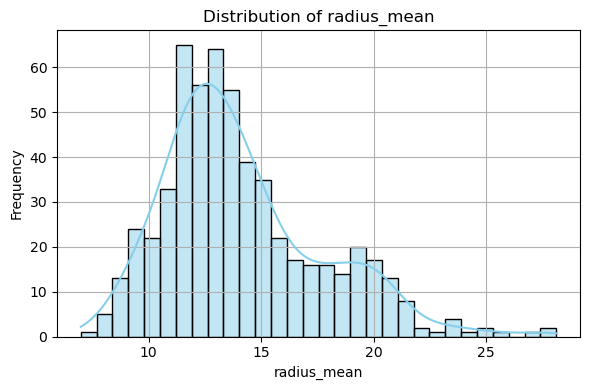

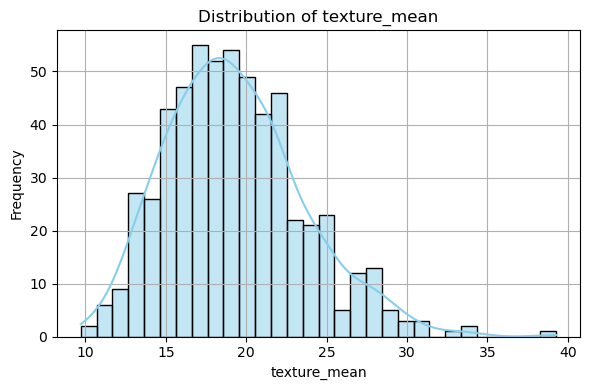

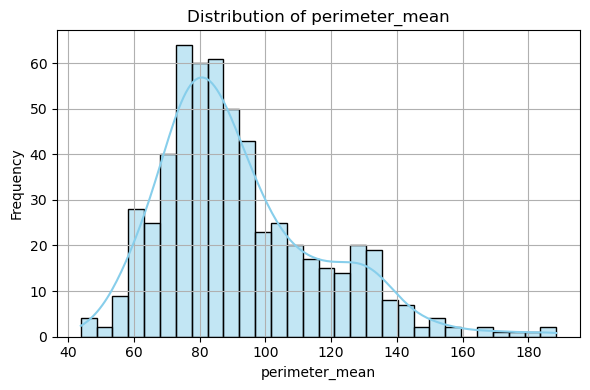

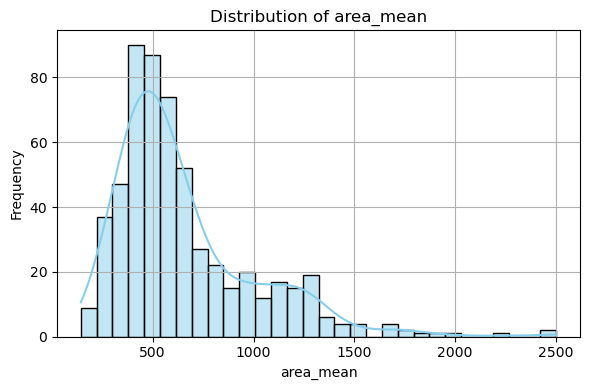

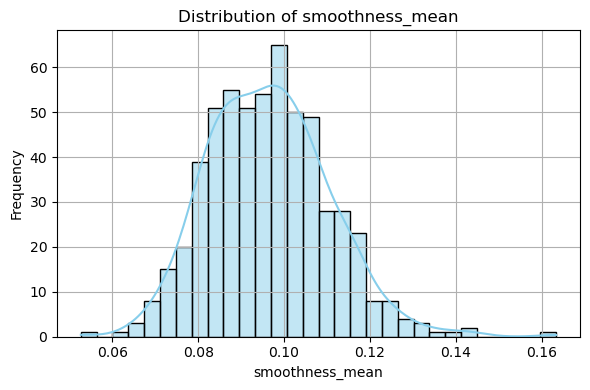

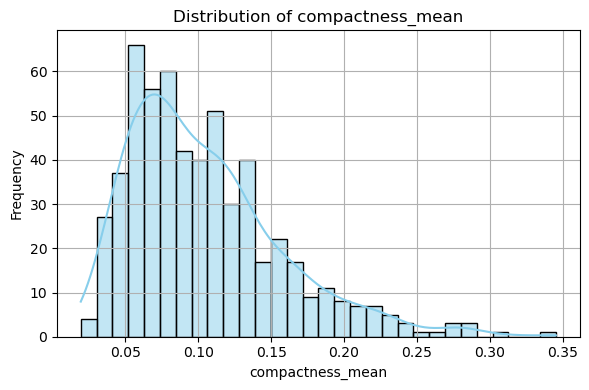

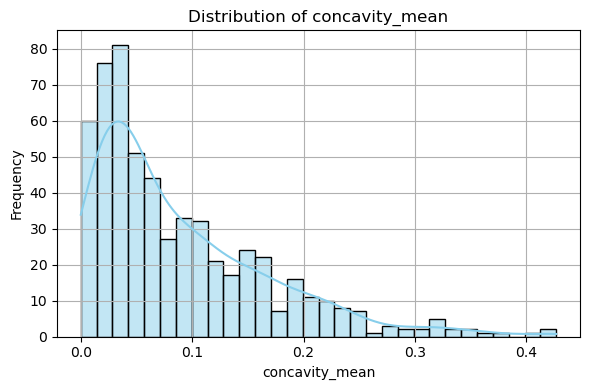

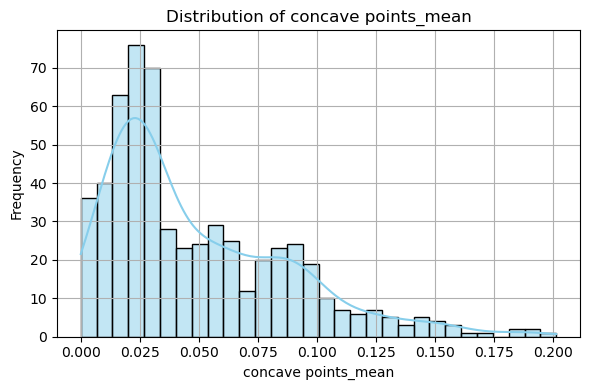

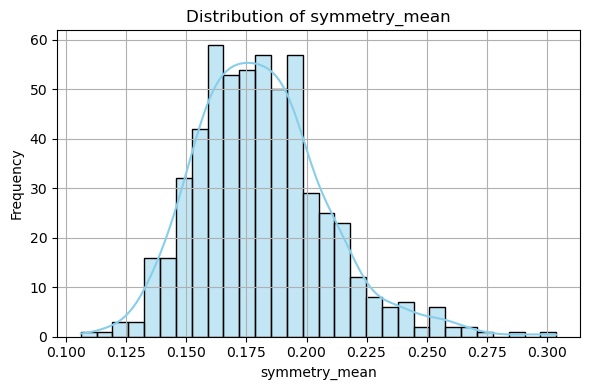

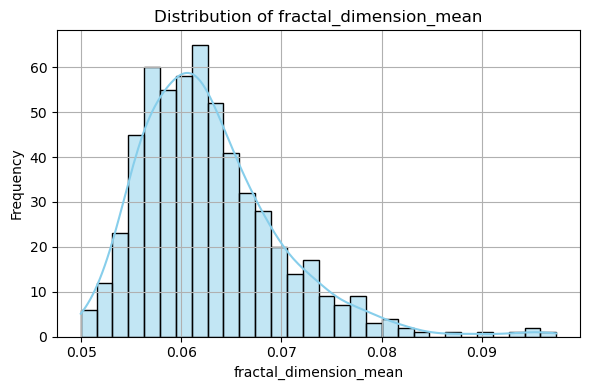

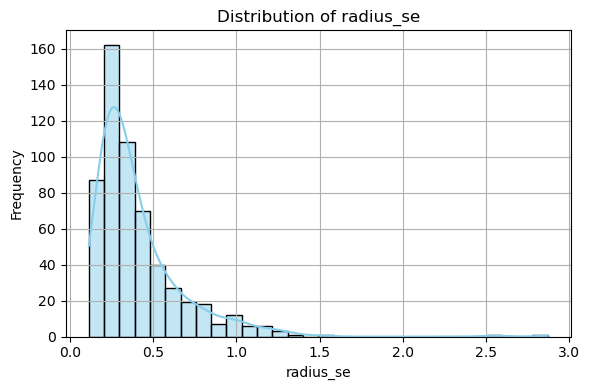

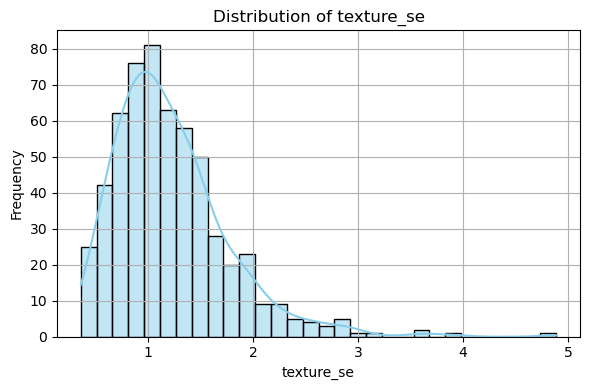

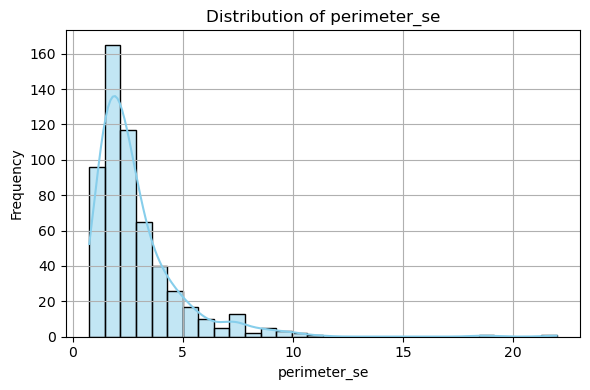

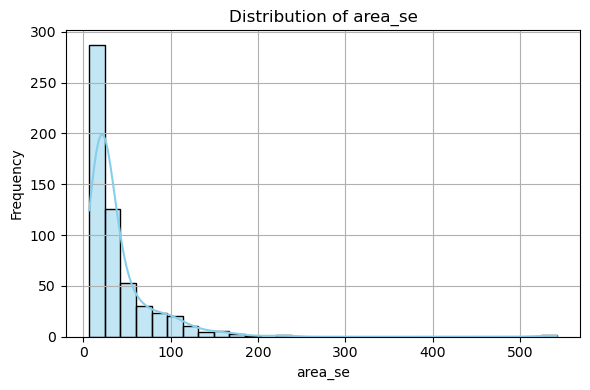

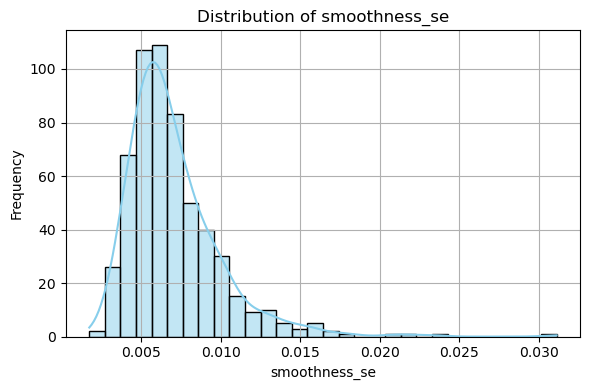

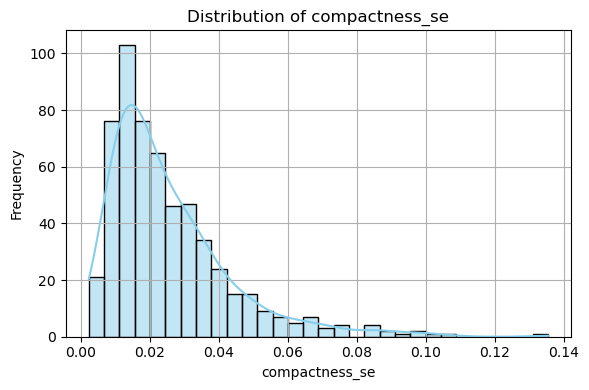

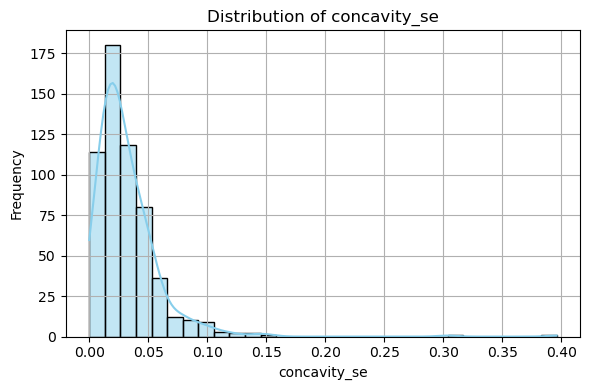

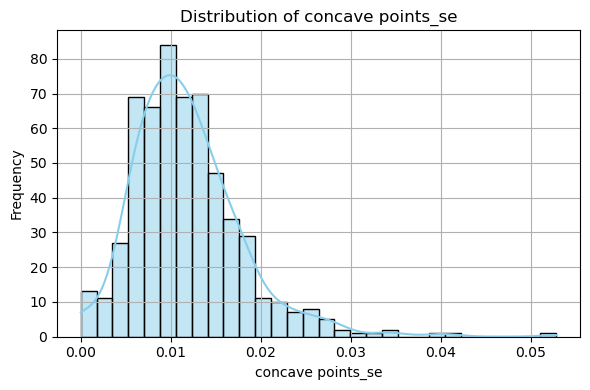

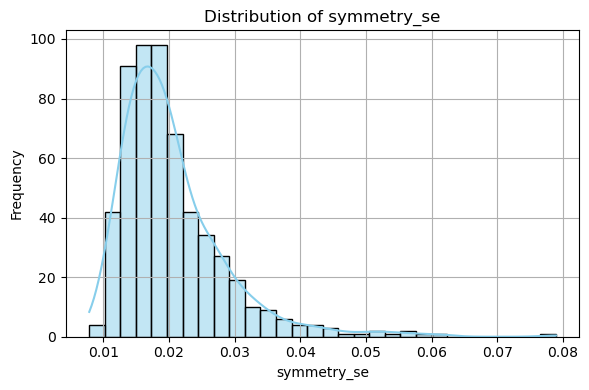

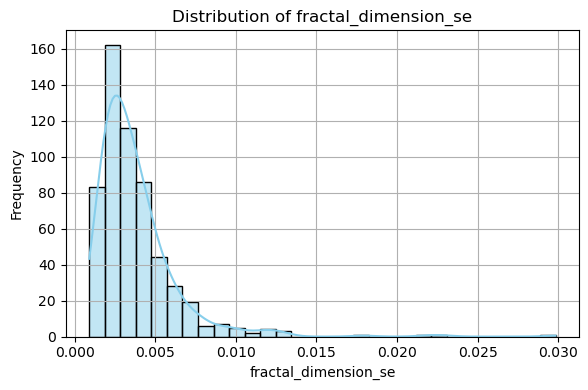

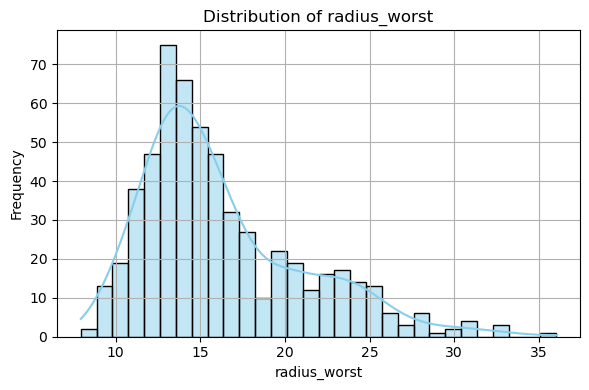

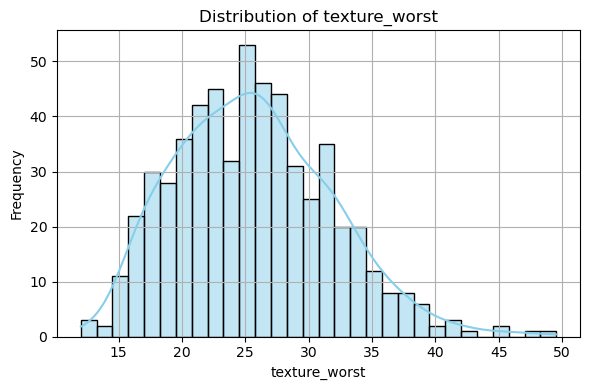

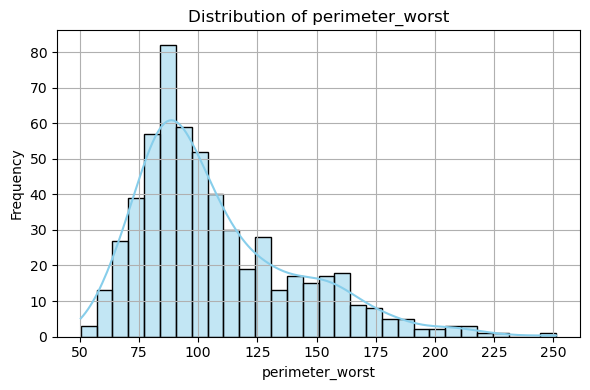

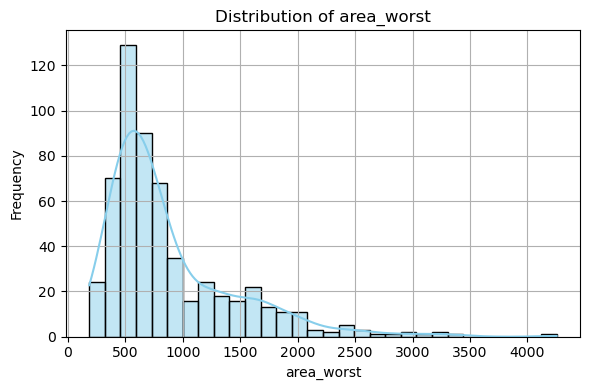

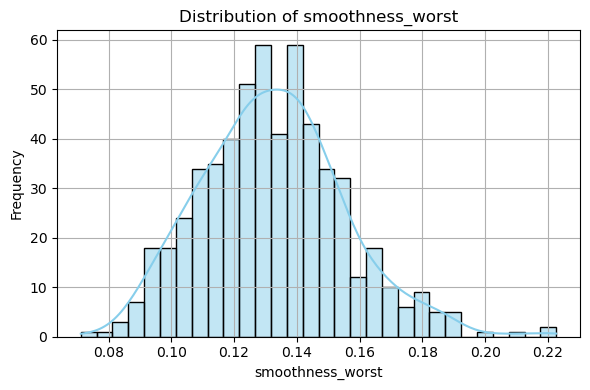

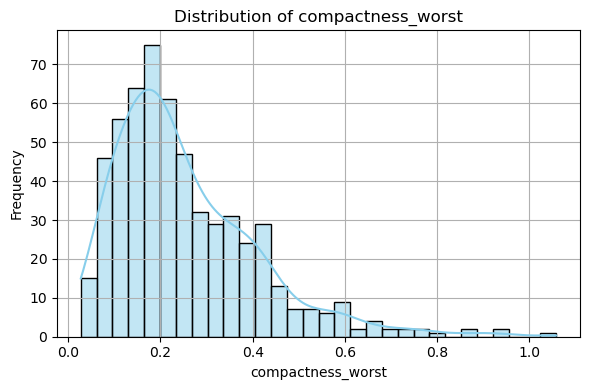

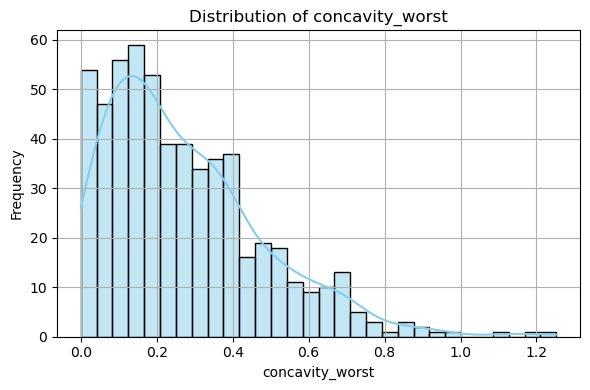

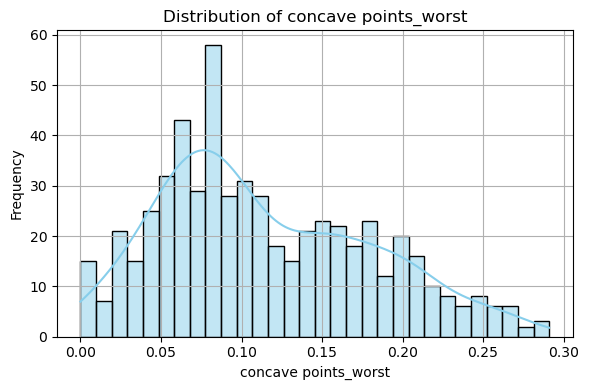

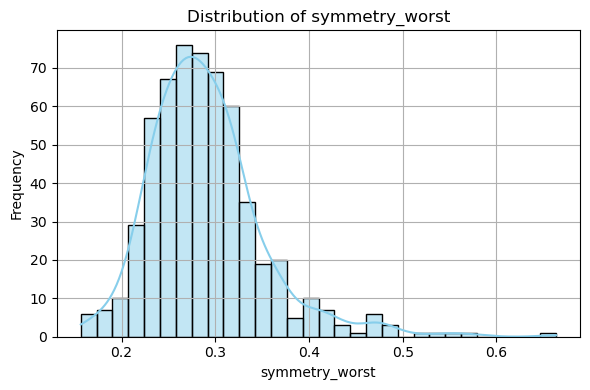

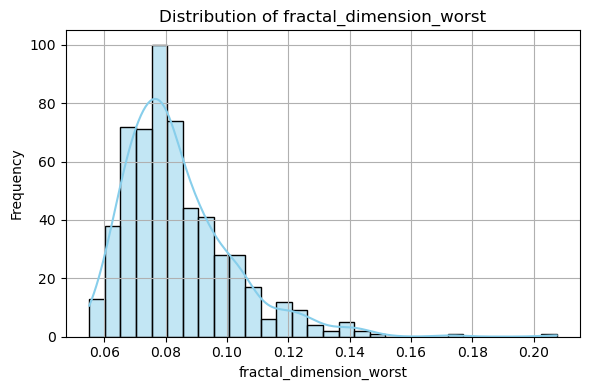

In [4]:
# Describe numerical data
# Filter numerical/continuous columns
df = df.drop(columns=df.columns[0])
numeric_cols = df.select_dtypes(include=['number'])
# Descriptive statistics
desc_stats = pd.DataFrame({
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max(),
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Std Dev': numeric_cols.std(),
    'Skewness': numeric_cols.skew(),
    'Kurtosis': numeric_cols.kurt()
})

print("Descriptive Statistics:")
print(desc_stats.round(3))  # Round for cleaner display

# Plot distributions
for col in numeric_cols.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Visualization
- Plot data (Unidimensional (Histograms) and Multidemensional(Scatterplots))

In [ ]:
# Visualization
# - Plot data (Unidimensional (Histograms) and Multidemensional(Scatterplots)
sns.pairplot(df, corner=True)  # corner=True hides duplicate upper plots
plt.show()

Highly correlated feature pairs (|r| > 0.95):
[('perimeter_mean', 'radius_mean'), ('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('perimeter_se', 'radius_se'), ('area_se', 'radius_se'), ('radius_worst', 'radius_mean'), ('radius_worst', 'perimeter_mean'), ('radius_worst', 'area_mean'), ('perimeter_worst', 'radius_mean'), ('perimeter_worst', 'perimeter_mean'), ('perimeter_worst', 'area_mean'), ('perimeter_worst', 'radius_worst'), ('area_worst', 'area_mean'), ('area_worst', 'radius_worst'), ('area_worst', 'perimeter_worst')]


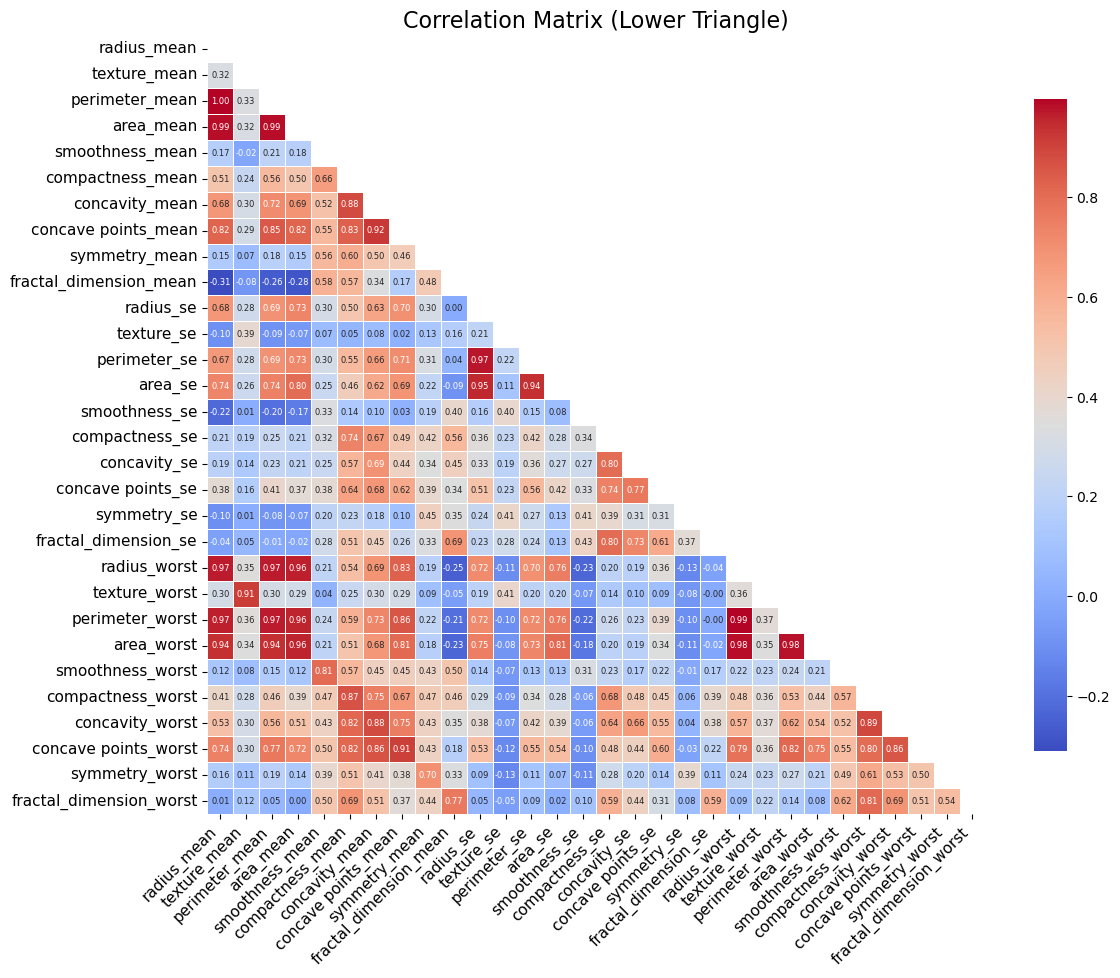

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature pairs with correlation > 0.95
to_combine = [(col, row) for col in upper.columns for row in upper.index if upper.loc[row, col] > 0.95]

print("Highly correlated feature pairs (|r| > 0.95):")
print(to_combine)

numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Generate a mask for the upper triangle (hide it)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))  # bigger figure

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.7,         
    linecolor='white',
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 6} 
)

plt.xticks(rotation=45, ha='right', fontsize=11)  # rotate x labels for readability
plt.yticks(fontsize=11)
plt.title("Correlation Matrix (Lower Triangle)", fontsize=16)
plt.tight_layout()
plt.show()


## 2. Data Preperation

**Task**
- Detail how you selected and filtered your data
- Explain any transformations or feature engineering steps (including missing


Variable Cleaning
- Incorrect Values (True instead of 1, 1.000 instead of 1000 → else remove observations)
- Consistency in Data (same format, check time and dates, ..)

In [ ]:
# The given data does not include incorrect values and is fully consistent as it only contains float values

Outliers
- Find 1. Point (univariate) outliers or/and 2. Contextual (multivariate) outliers
- Methods to detect outliers: Tukey's Fence and Standardization / 3DS Method
- Methods to detect multivariate outliers: Mahalanobis distance, PCA-based techniques, Robuts Covariance Estimation
- Handle outliers: remove, transform, ignore

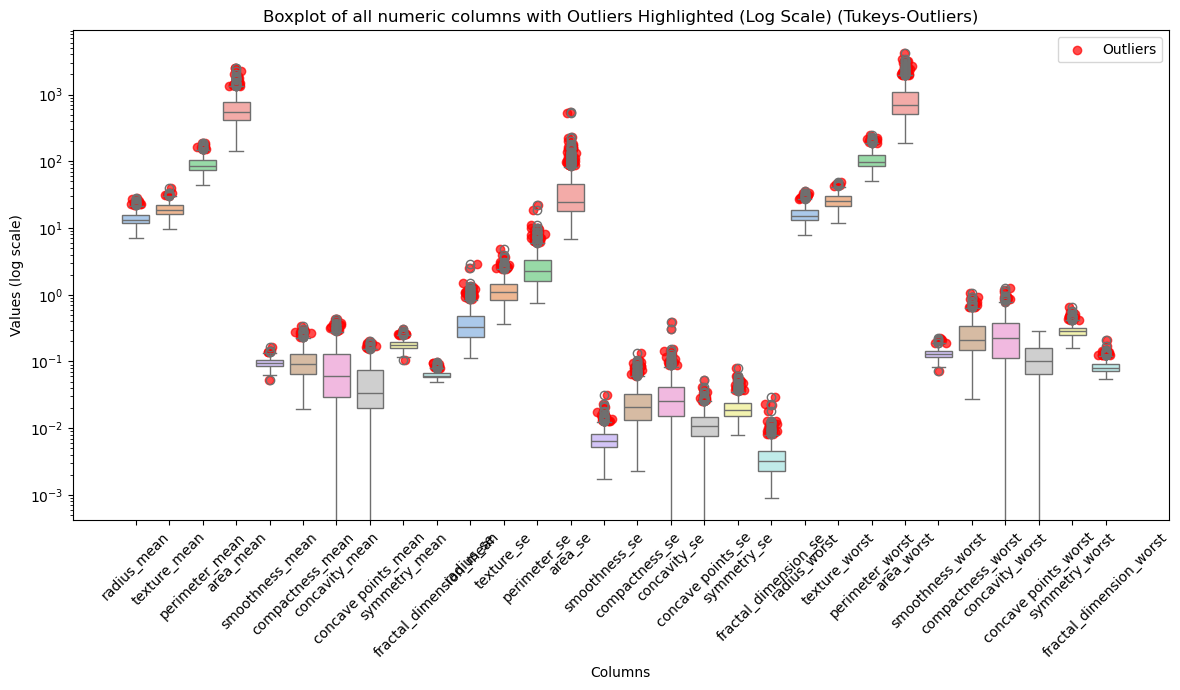

Outliers in column 'radius_mean': [25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
 23.09 24.63]
Outliers in column 'texture_mean': [32.47 33.81 39.28 33.56 31.12 30.72 30.62]
Outliers in column 'perimeter_mean': [171.5 152.8 166.2 152.1 182.1 158.9 188.5 153.5 155.1 174.2 186.9 152.1
 165.5]
Outliers in column 'area_mean': [1404. 1878. 1509. 1761. 1686. 2250. 1685. 2499. 1670. 1364. 1419. 1491.
 1747. 2010. 1546. 1482. 1386. 1335. 1407. 1384. 2501. 1682. 1841. 1347.
 1479.]
Outliers in column 'smoothness_mean': [0.1425  0.1398  0.1447  0.1634  0.1371  0.05263]
Outliers in column 'compactness_mean': [0.2776 0.2839 0.2396 0.2458 0.2293 0.3454 0.2665 0.2768 0.2867 0.2832
 0.2413 0.3114 0.2364 0.2363 0.2576 0.277 ]
Outliers in column 'concavity_mean': [0.3001 0.313  0.3754 0.3339 0.4264 0.3003 0.4268 0.4108 0.2871 0.3523
 0.3201 0.3176 0.2914 0.3368 0.3189 0.3635 0.3174 0.3514]
Outliers in column 'concave points_mean': [0.1604 0.1845 0.1823 0.2012 0.1878 0.162  0.1

In [ ]:
tukeys_outliers_dict = {}

def tukeys_outliers(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - k * IQR
    upper_fence = Q3 + k * IQR
    return (series < lower_fence) | (series > upper_fence)

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 7))

# Draw boxplot for all columns side by side
sns.boxplot(data=numeric_df, palette='pastel')

# Overlay outliers as red dots
for i, col in enumerate(numeric_df.columns):
    outlier_mask = tukeys_outliers(numeric_df[col])
    outliers = numeric_df.loc[outlier_mask, col]
    tukeys_outliers_dict[col] = outliers.values
    x = np.random.normal(i, 0.08, size=len(outliers))  # jitter for visibility
    plt.scatter(x, outliers, color='red', alpha=0.7, label='Outliers' if i == 0 else "")

plt.yscale('log')  # Apply logarithmic scale to y-axis

plt.title('Boxplot of all numeric columns with Outliers Highlighted (Log Scale) (Tukeys-Outliers)')
plt.xlabel('Columns')
plt.ylabel('Values (log scale)')
plt.xticks(ticks=range(len(numeric_df.columns)), labels=numeric_df.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

for col, vals in tukeys_outliers_dict.items():
    print(f"Outliers in column '{col}': {vals}")


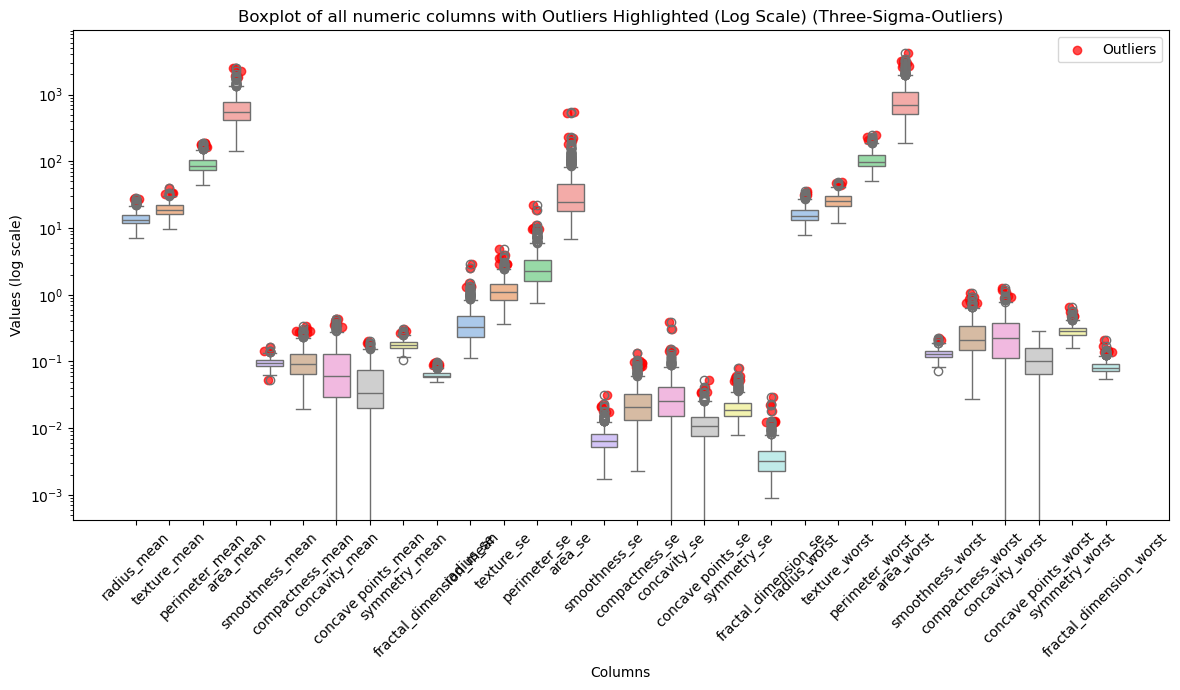

3-sigma outliers in 'radius_mean': [25.22 27.22 28.11 25.73 27.42]
3-sigma outliers in 'texture_mean': [32.47 33.81 39.28 33.56]
3-sigma outliers in 'perimeter_mean': [171.5 166.2 182.1 188.5 174.2 186.9 165.5]
3-sigma outliers in 'area_mean': [1878. 1761. 2250. 2499. 1747. 2010. 2501. 1841.]
3-sigma outliers in 'smoothness_mean': [0.1425  0.1398  0.1447  0.1634  0.05263]
3-sigma outliers in 'compactness_mean': [0.2776 0.2839 0.3454 0.2665 0.2768 0.2867 0.2832 0.3114 0.277 ]
3-sigma outliers in 'concavity_mean': [0.3754 0.3339 0.4264 0.4268 0.4108 0.3523 0.3368 0.3635 0.3514]
3-sigma outliers in 'concave points_mean': [0.1845 0.1823 0.2012 0.1878 0.1913 0.1689]
3-sigma outliers in 'symmetry_mean': [0.304  0.2743 0.2906 0.2655 0.2678]
3-sigma outliers in 'fractal_dimension_mean': [0.09744 0.0898  0.09296 0.08743 0.0845  0.09502 0.09575]
3-sigma outliers in 'radius_se': [1.509 1.296 2.873 1.292 1.37  2.547 1.291]
3-sigma outliers in 'texture_se': [3.568 2.91  3.12  4.885 2.878 3.647 2.92

In [ ]:
def three_sigma_outliers(series, sigma=3):
    mean = series.mean()
    std = series.std()
    lower_bound = mean - sigma * std
    upper_bound = mean + sigma * std
    return (series < lower_bound) | (series > upper_bound)

numeric_df = df.select_dtypes(include='number')

outliers_dict_3sigma = {}

plt.figure(figsize=(12, 7))

# Draw boxplot for all columns side by side
sns.boxplot(data=numeric_df, palette='pastel')

# Overlay outliers as red dots
for i, col in enumerate(numeric_df.columns):
    outlier_mask = three_sigma_outliers(numeric_df[col])
    outliers = numeric_df.loc[outlier_mask, col]
    tukeys_outliers_dict[col] = outliers.values
    x = np.random.normal(i, 0.08, size=len(outliers))  # jitter for visibility
    plt.scatter(x, outliers, color='red', alpha=0.7, label='Outliers' if i == 0 else "")

plt.yscale('log')  # Apply logarithmic scale to y-axis

plt.title('Boxplot of all numeric columns with Outliers Highlighted (Log Scale) (Three-Sigma-Outliers)')
plt.xlabel('Columns')
plt.ylabel('Values (log scale)')
plt.xticks(ticks=range(len(numeric_df.columns)), labels=numeric_df.columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

for col in numeric_df.columns:
    outlier_mask = three_sigma_outliers(numeric_df[col])
    outliers = numeric_df.loc[outlier_mask, col]
    outliers_dict_3sigma[col] = outliers.values  # or list(outliers)

# Print outliers per column
for col, vals in outliers_dict_3sigma.items():
    print(f"3-sigma outliers in '{col}': {vals}")

In [ ]:
# Compare both outliers from tukeys and 3sigma method
outliers_result_dict = {}
for key, value in tukeys_outliers_dict.items():
    compare_val = outliers_dict_3sigma.get(key)
    common = list(set(compare_val) & set(outliers_dict_3sigma.get(key)))
    outliers_result_dict[key] = common


print("Common Outliers in Columns (Tukey's & 3-Sigma methods):\n")
for col, common_vals in outliers_result_dict.items():
    if common_vals:
        print(f"- {col}:")
        for val in common_vals:
            print(f"    • {val}")
    else:
        print(f"- {col}: No common outliers found.")

Common Outliers in Columns (Tukey's & 3-Sigma methods):

- radius_mean:
    • 27.22
    • 25.22
    • 27.42
    • 28.11
    • 25.73
- texture_mean:
    • 32.47
    • 33.81
    • 39.28
    • 33.56
- perimeter_mean:
    • 165.5
    • 166.2
    • 171.5
    • 174.2
    • 182.1
    • 186.9
    • 188.5
- area_mean:
    • 1761.0
    • 2499.0
    • 2501.0
    • 2250.0
    • 1841.0
    • 1747.0
    • 1878.0
    • 2010.0
- smoothness_mean:
    • 0.1425
    • 0.1634
    • 0.1447
    • 0.1398
    • 0.05263
- compactness_mean:
    • 0.2776
    • 0.2839
    • 0.2665
    • 0.2768
    • 0.3454
    • 0.2867
    • 0.2832
    • 0.3114
    • 0.277
- concavity_mean:
    • 0.3754
    • 0.3339
    • 0.4264
    • 0.4108
    • 0.4268
    • 0.3523
    • 0.3368
    • 0.3635
    • 0.3514
- concave points_mean:
    • 0.1845
    • 0.1823
    • 0.1878
    • 0.2012
    • 0.1913
    • 0.1689
- symmetry_mean:
    • 0.304
    • 0.2743
    • 0.2655
    • 0.2678
    • 0.2906
- fractal_dimension_mean:
    • 0.09744
    • 0

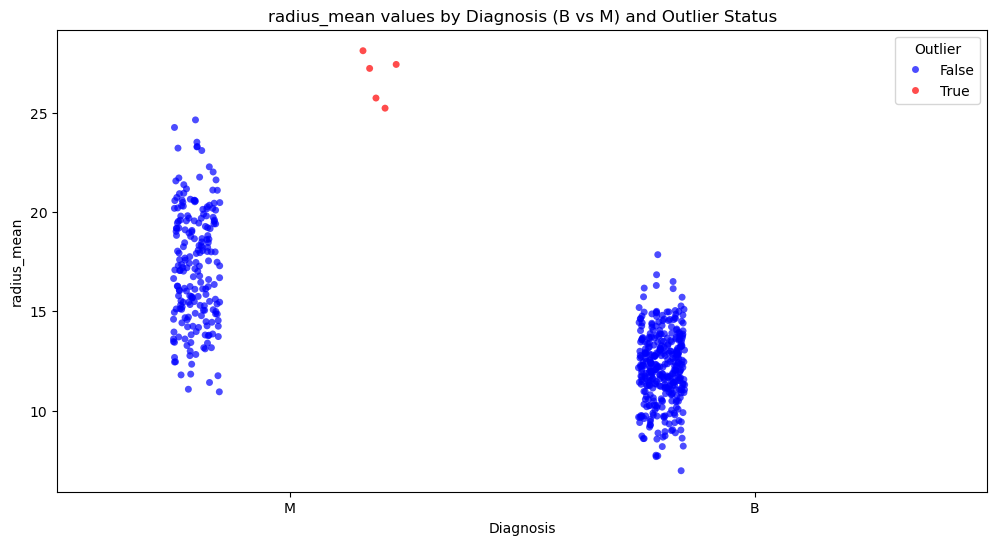

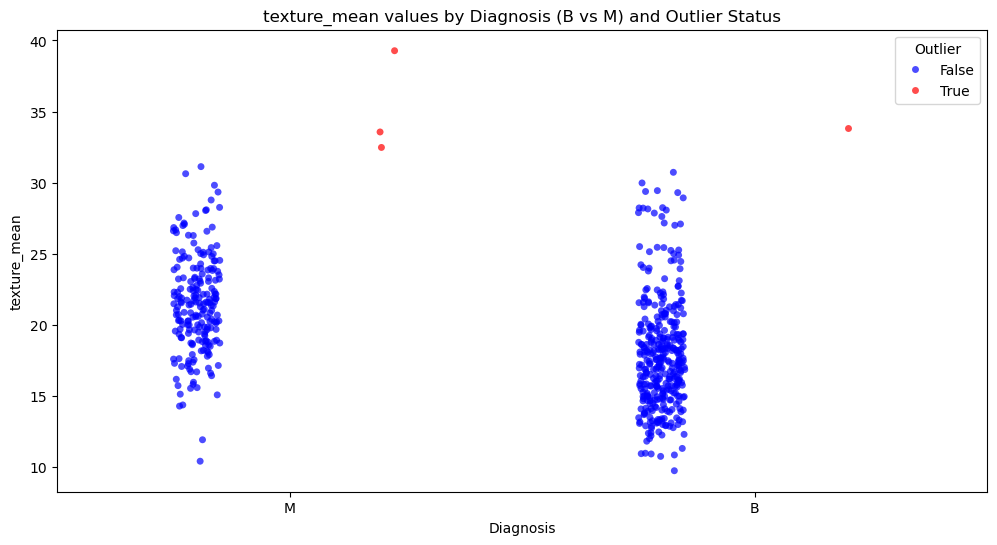

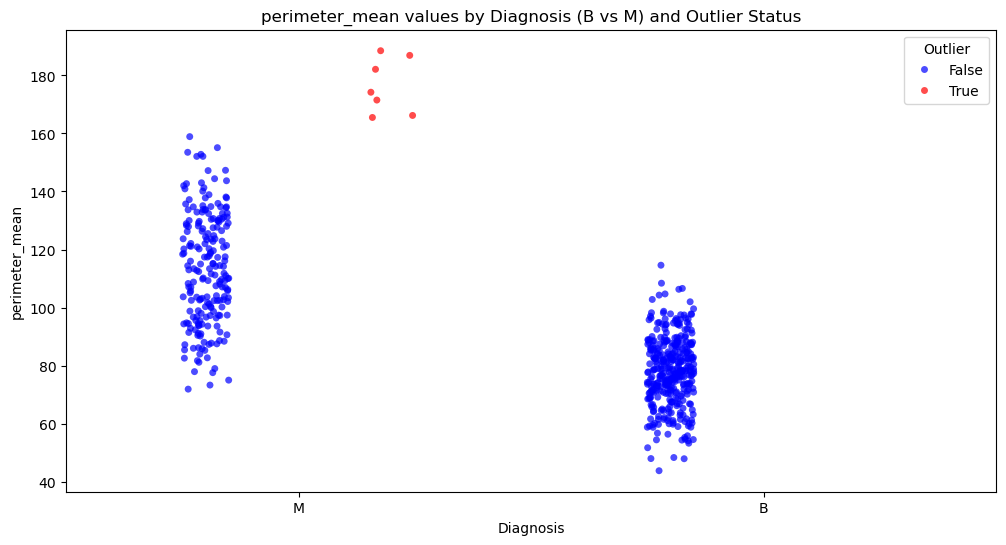

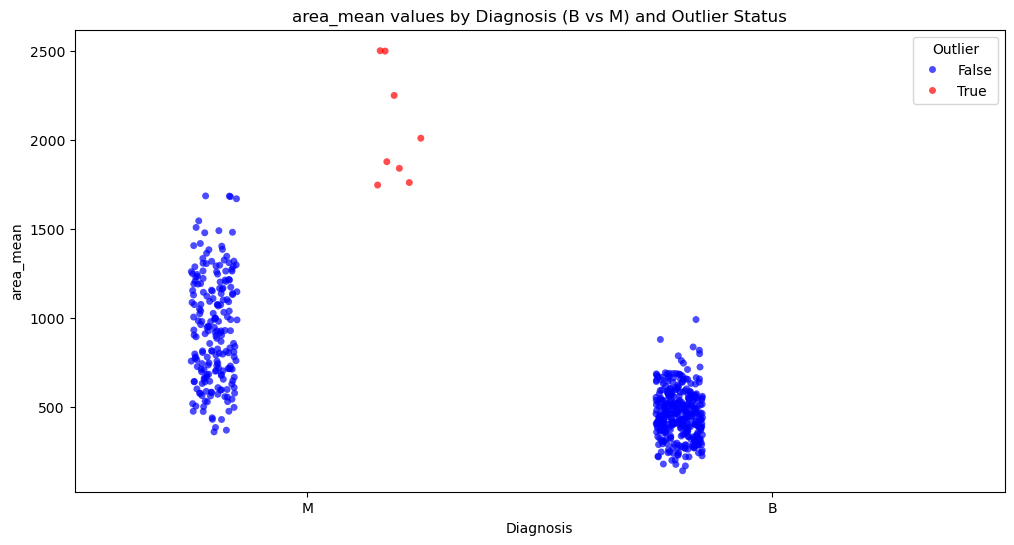

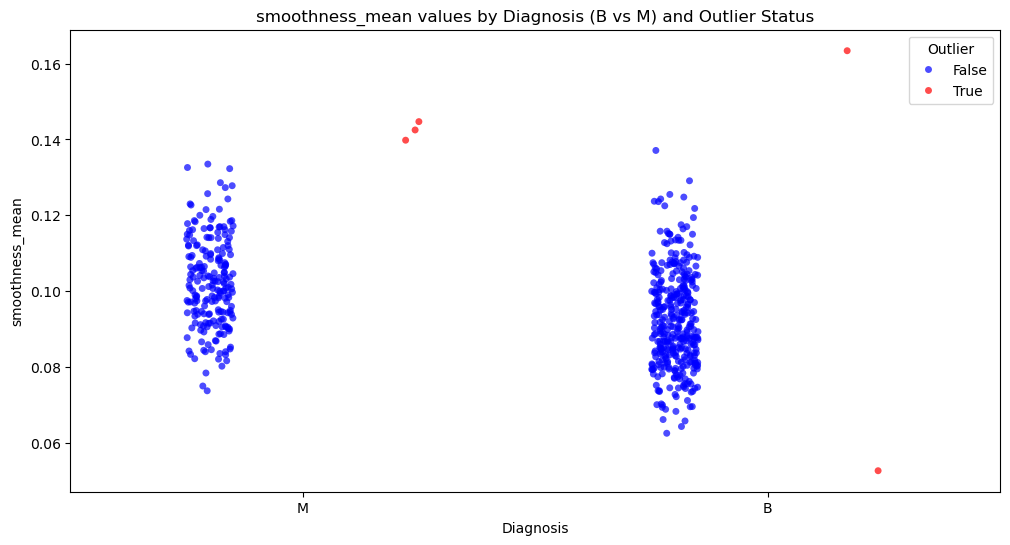

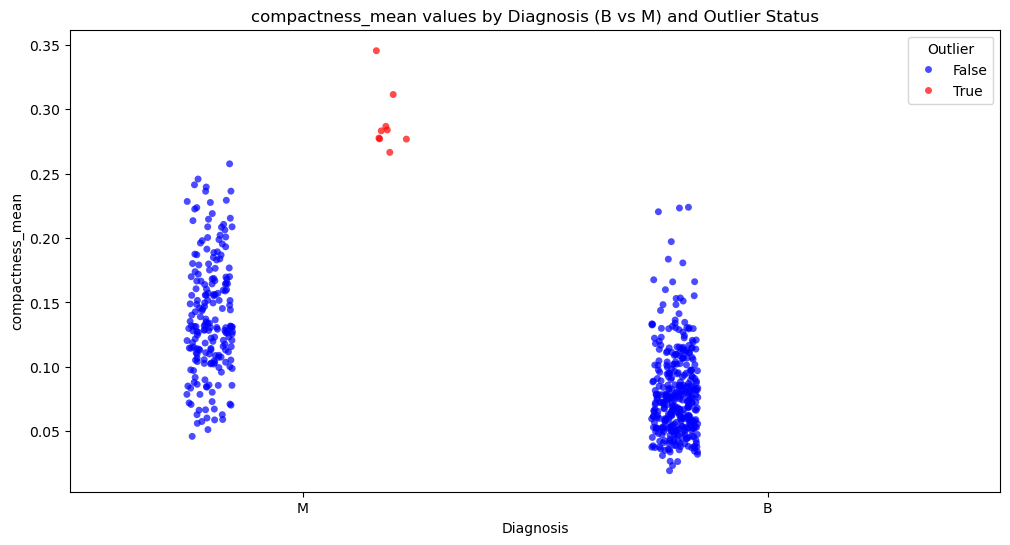

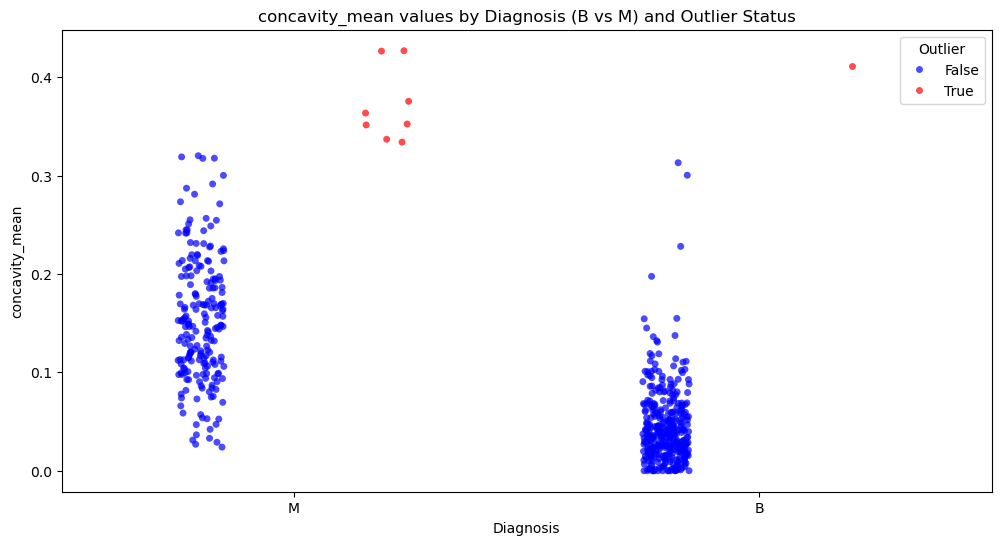

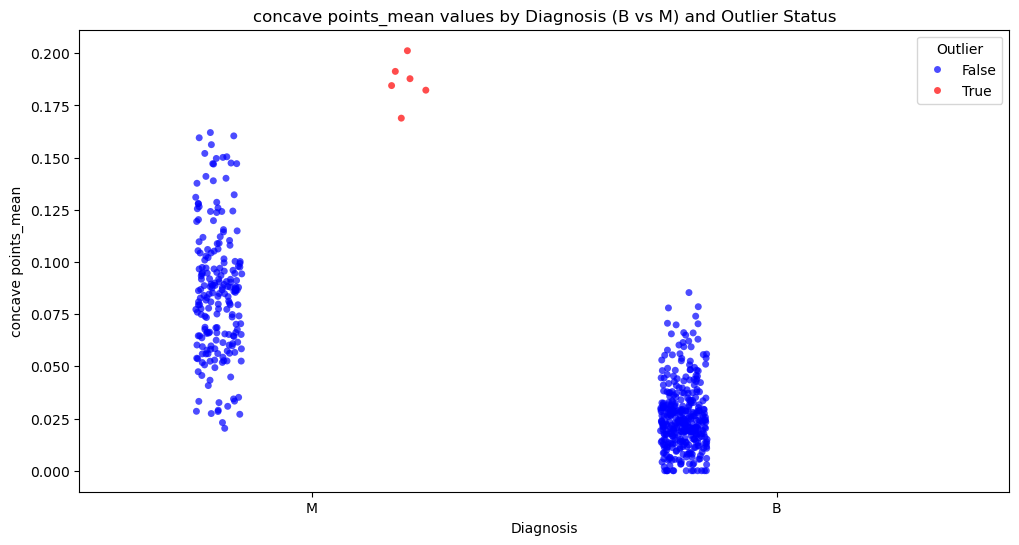

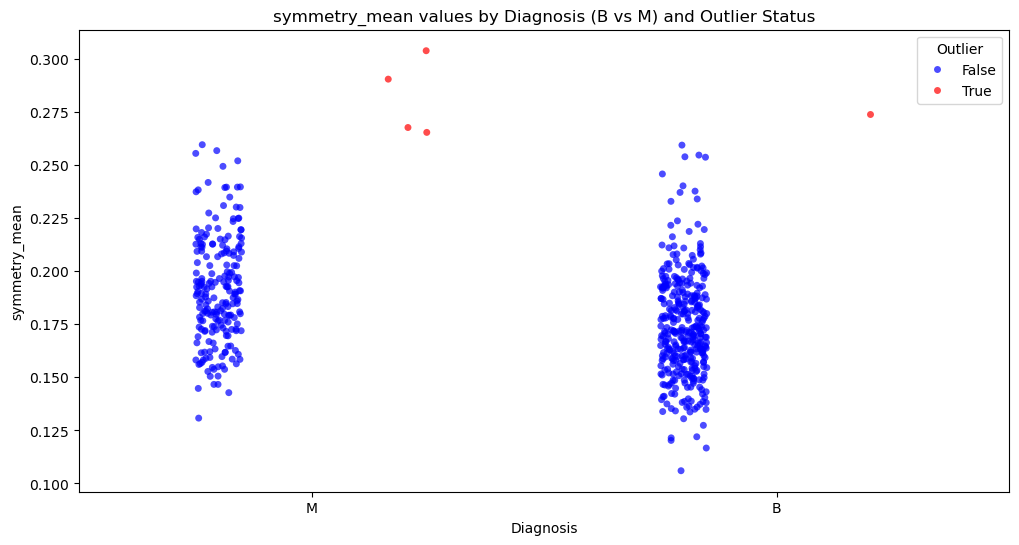

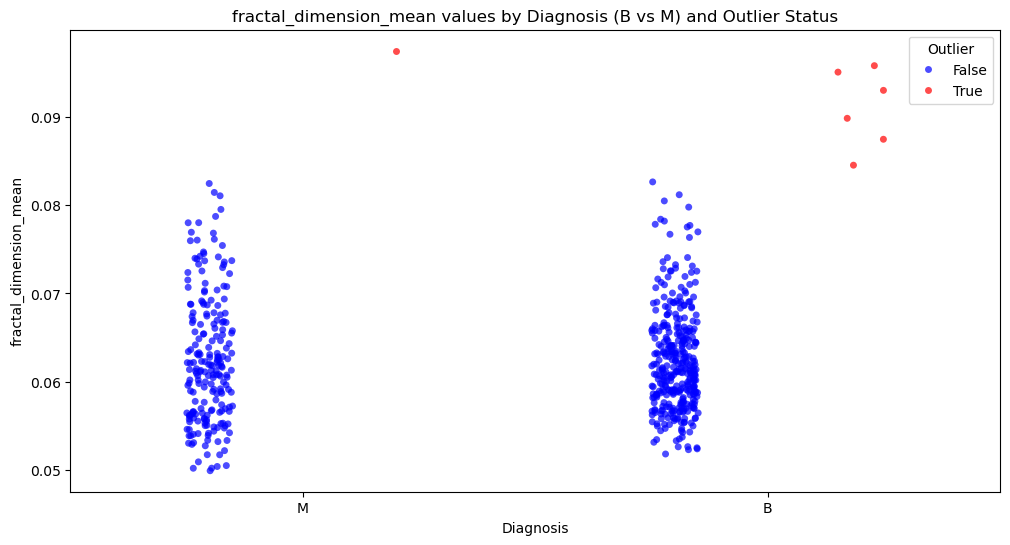

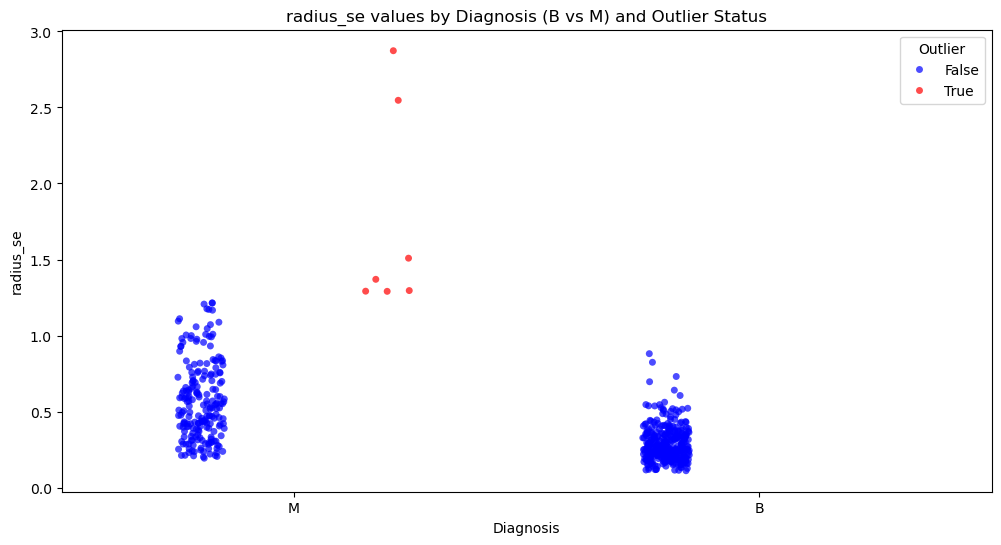

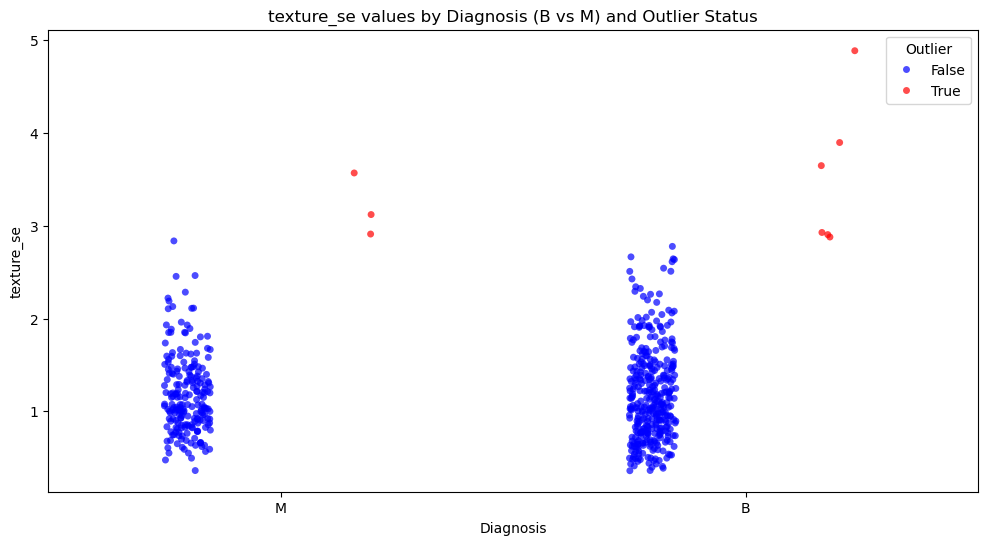

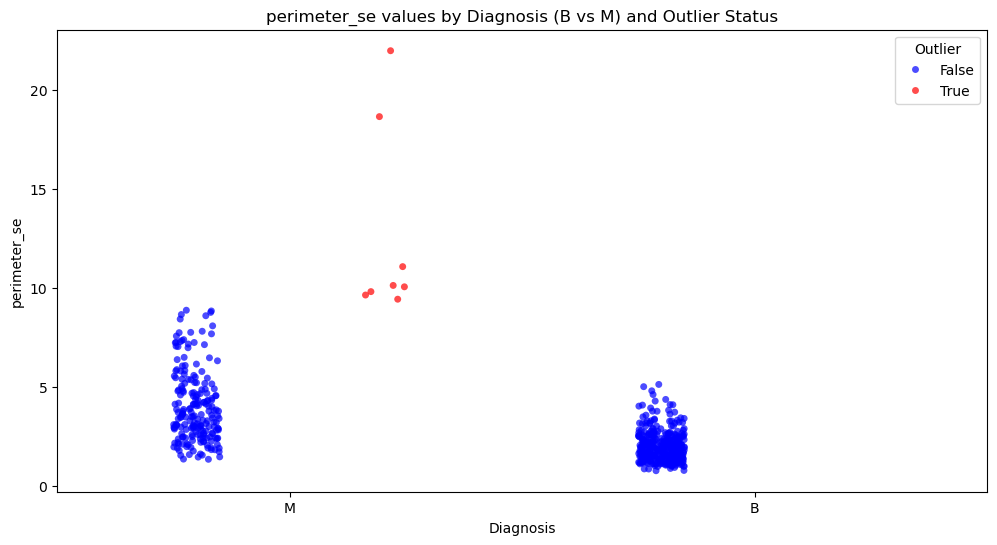

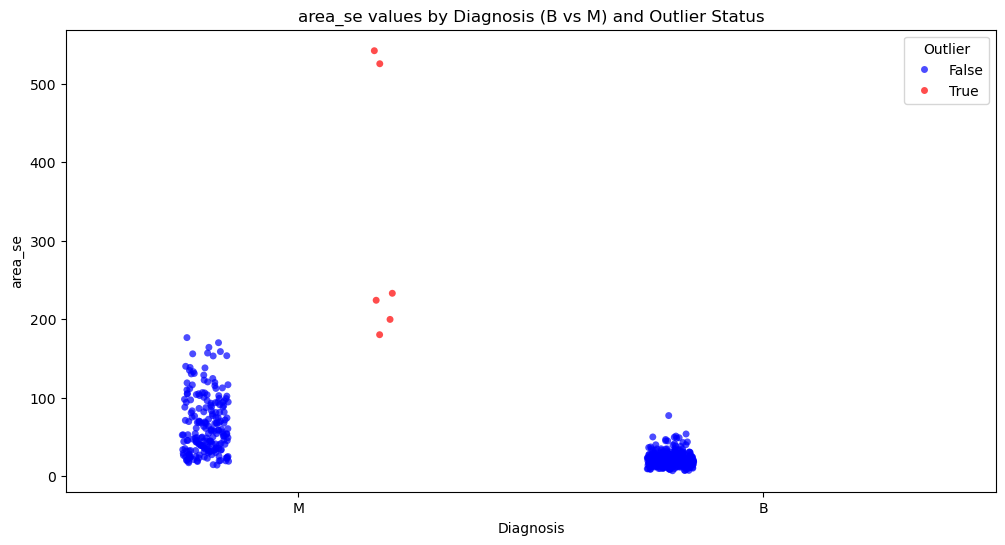

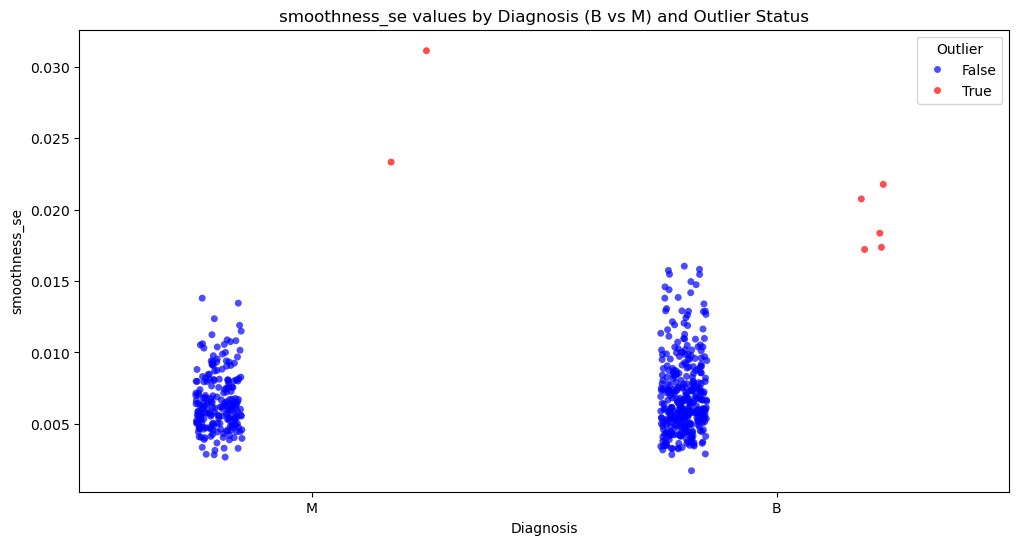

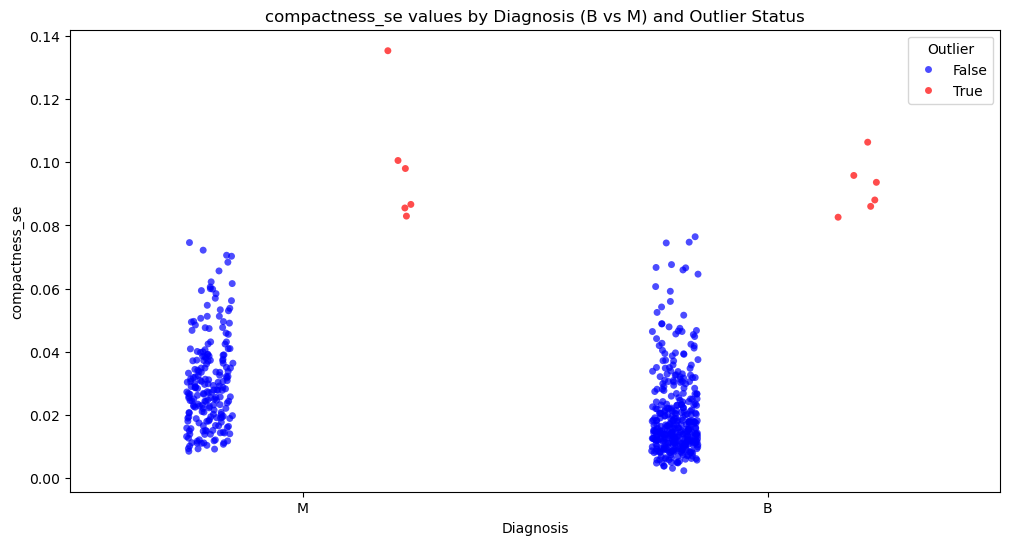

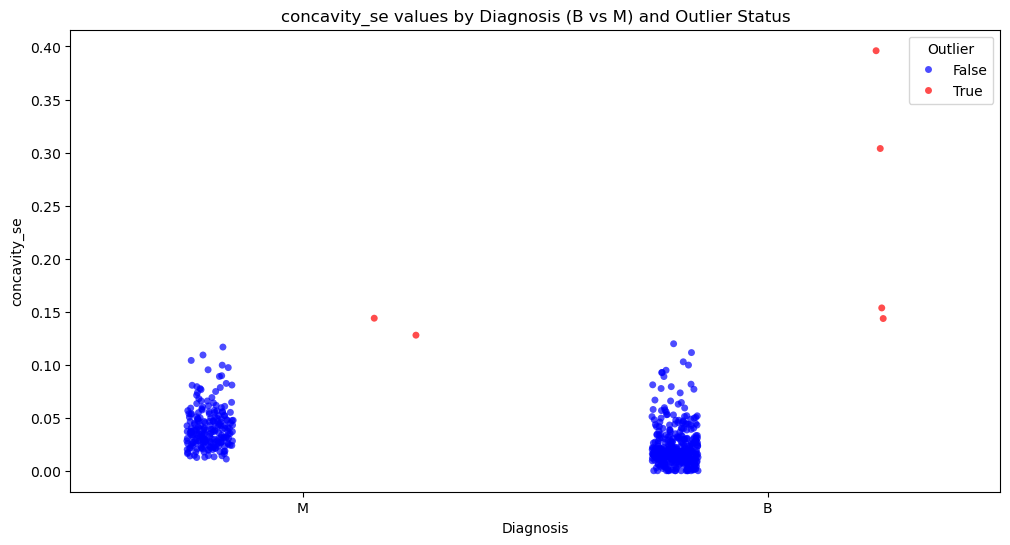

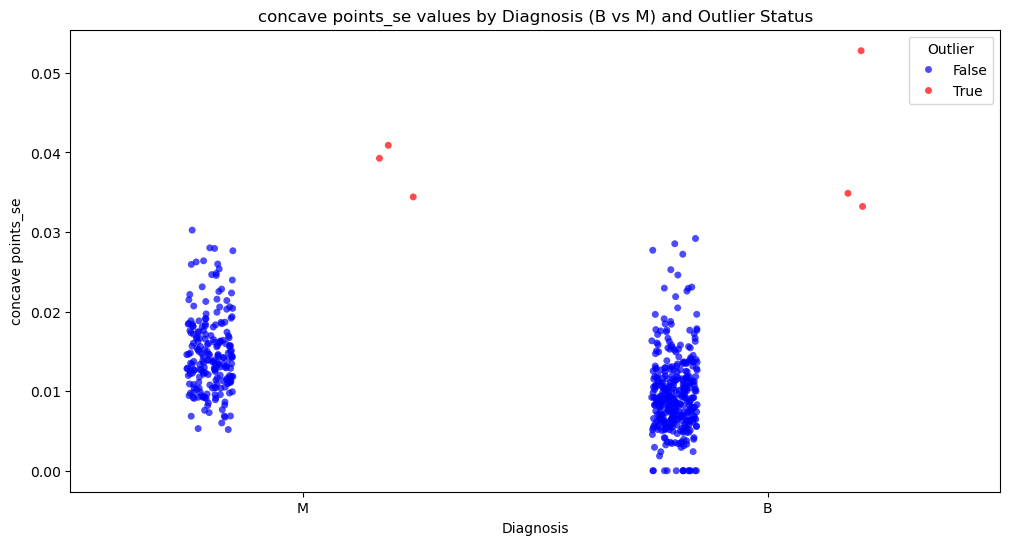

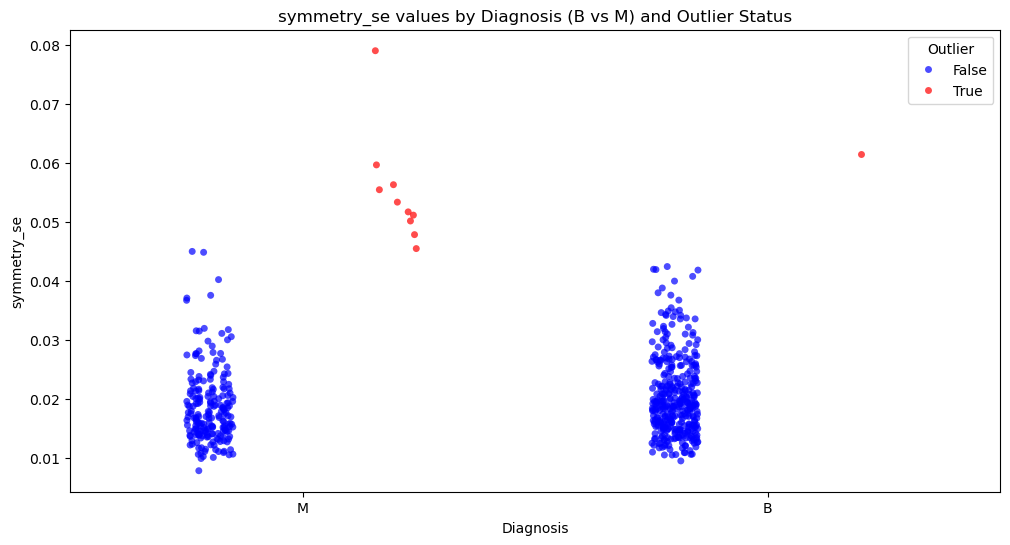

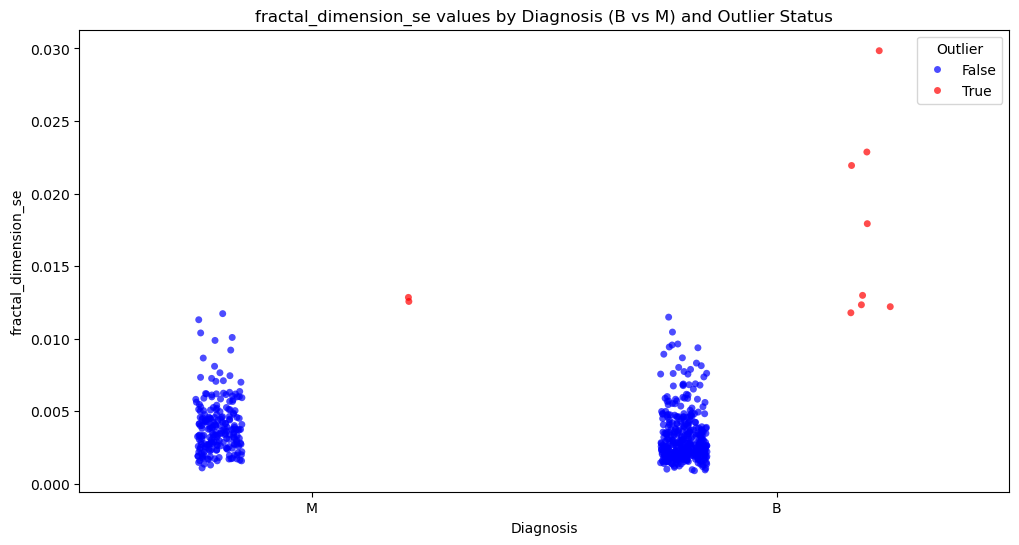

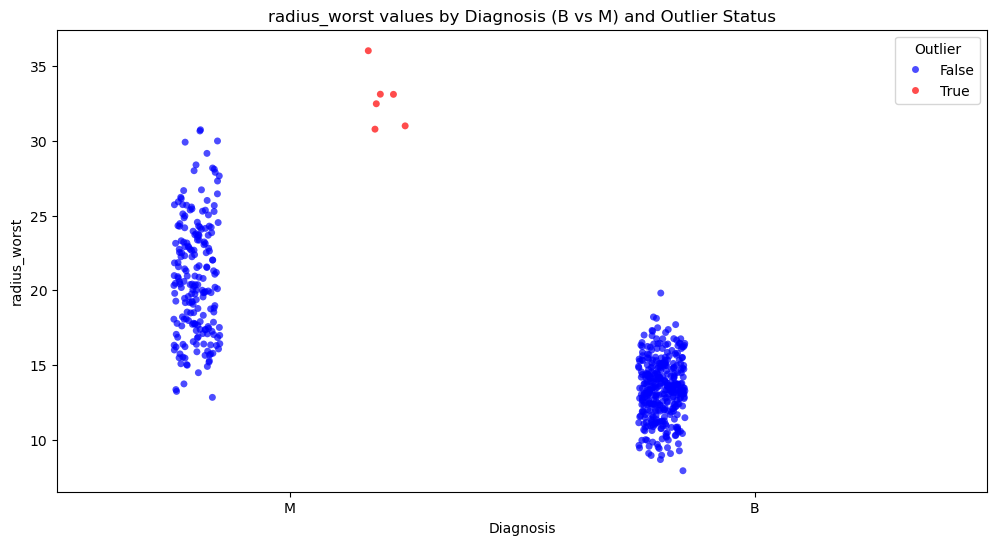

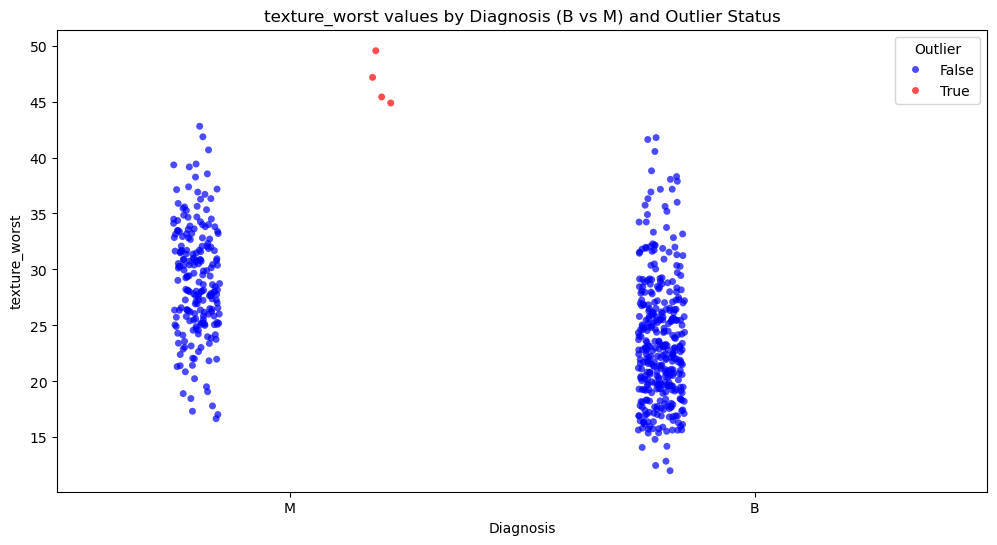

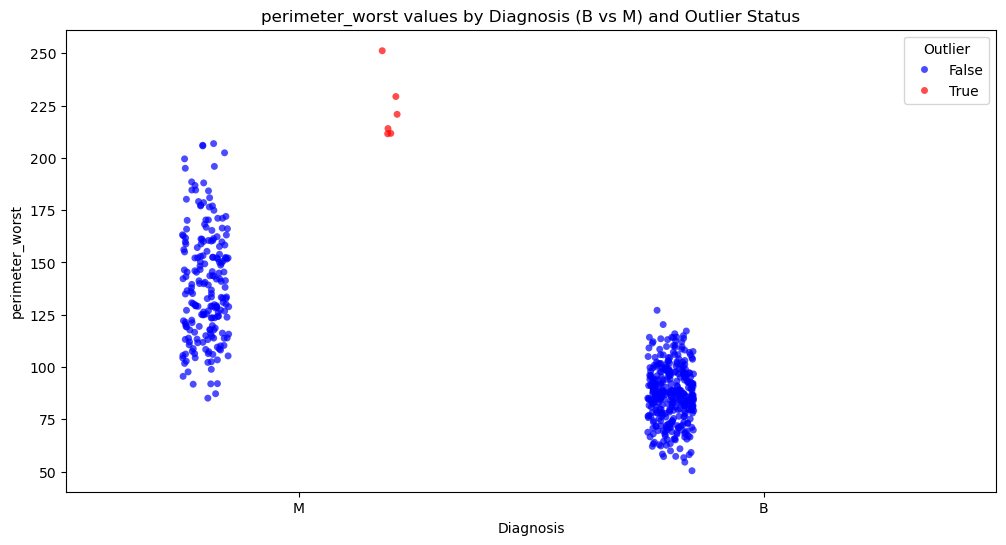

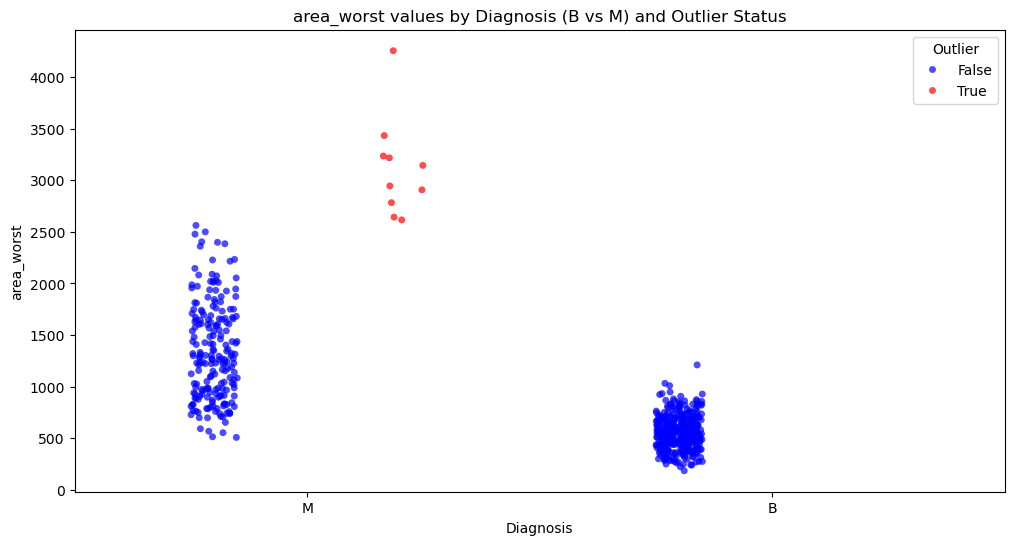

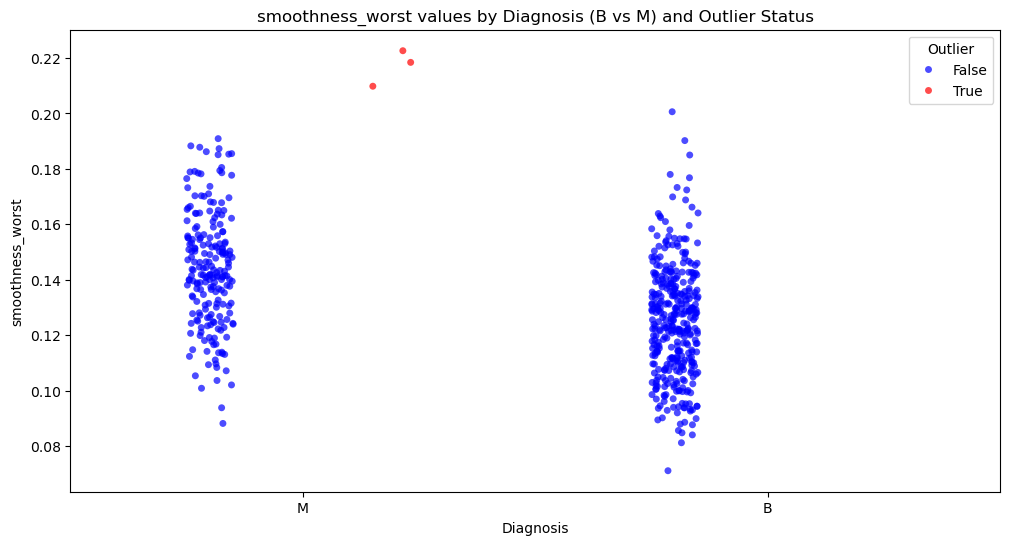

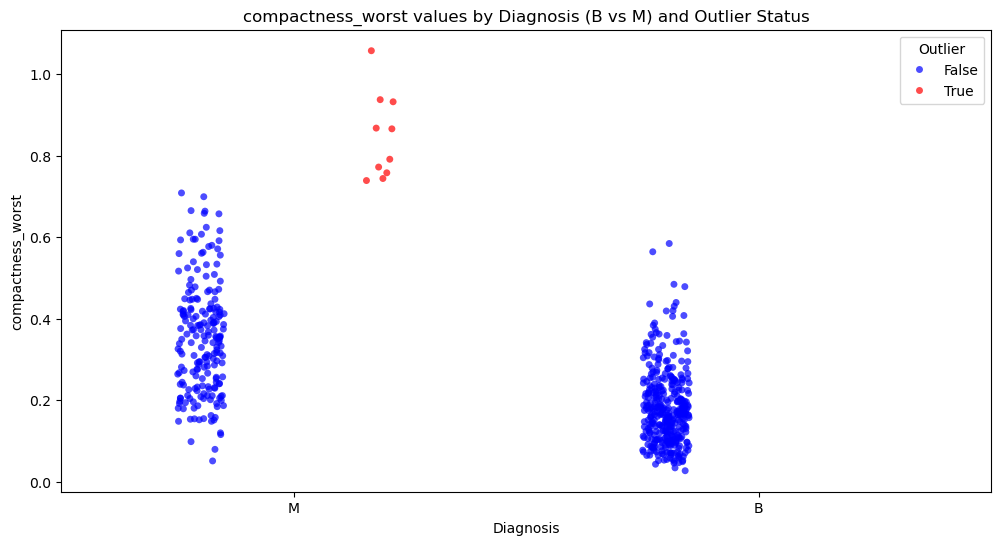

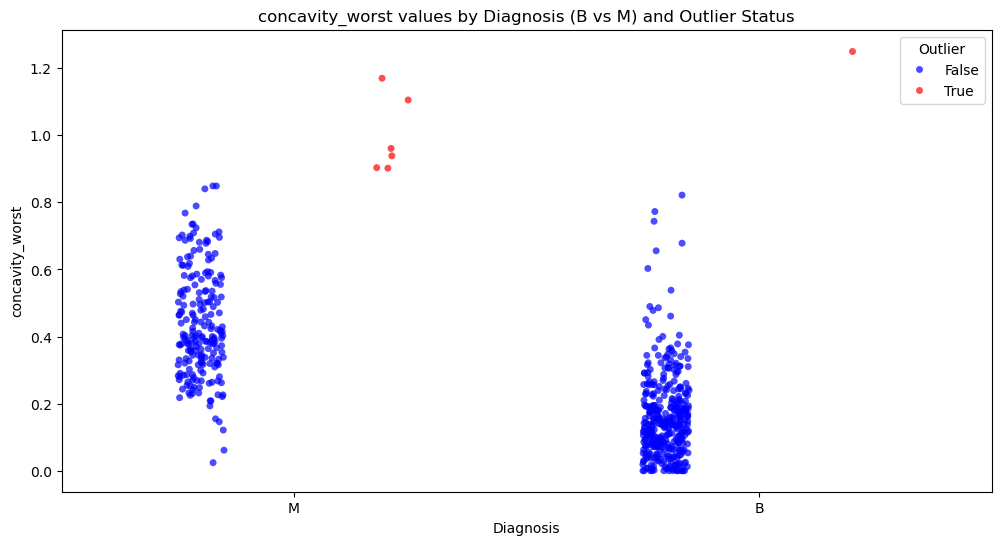

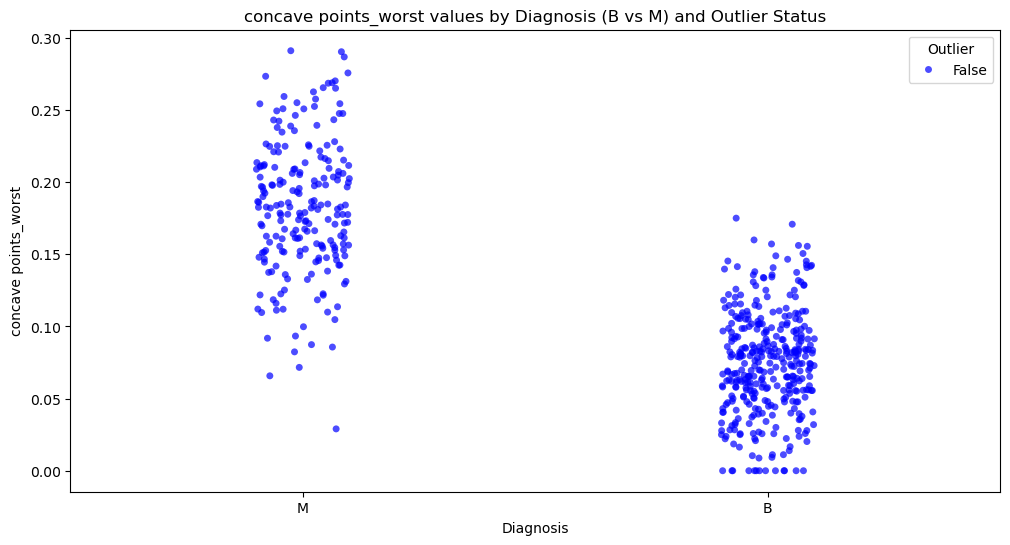

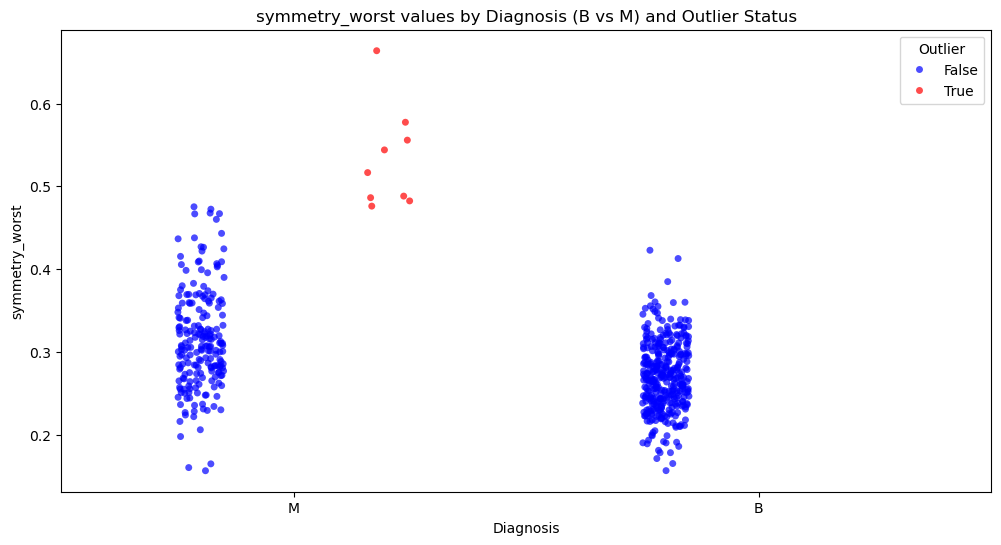

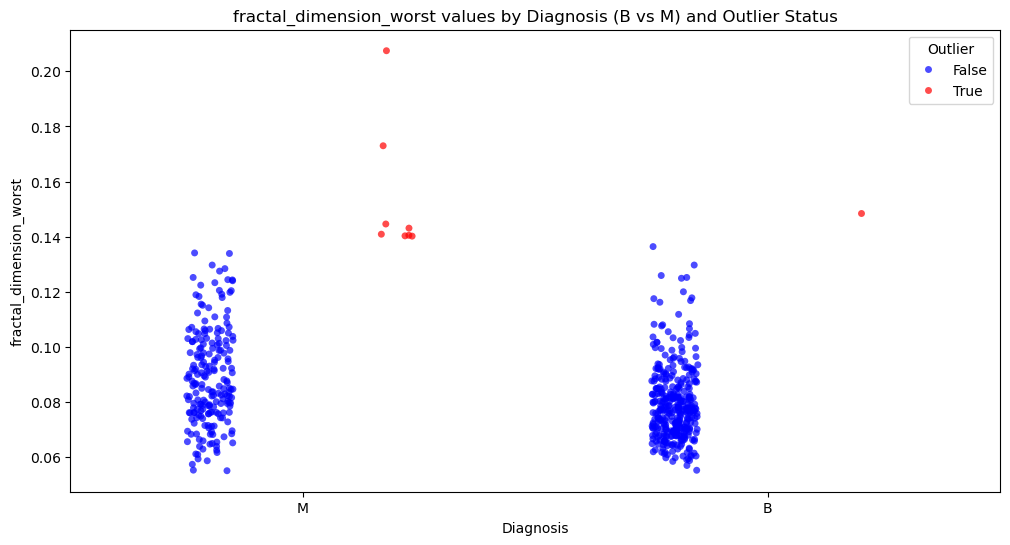

In [ ]:
# Handle outliers
for col, outlier_vals in outliers_result_dict.items():
    df[f'{col}_outlier'] = df[col].isin(outlier_vals)

numeric_cols = [col for col in df.select_dtypes(include='number').columns if col in outliers_result_dict]

for col in numeric_cols:
    plt.figure(figsize=(12,6))
    sns.stripplot(
        x='diagnosis',
        y=col,
        hue=f'{col}_outlier',
        data=df,
        jitter=True,
        palette={False: 'blue', True: 'red'},
        dodge=True,  # separates colors side-by-side per category
        alpha=0.7
    )
    plt.title(f'{col} values by Diagnosis (B vs M) and Outlier Status')
    plt.xlabel('Diagnosis')
    plt.ylabel(col)
    plt.legend(title='Outlier')
    plt.show()

The following patterns can be recognized when comparing the outliers:
* if outliers clearly influence a diagnosis, i.e. all outliers are on the M or B side, this means that these outliers have a strong effect on the target variable and should therefore be retained for machine learning in any case
* if outliers cannot be clearly assigned to a diagnosis, they are of little significance and should be deleted purely logically. However, this is not simply possible, as in this case we would have missing values in individual cells and thus rows. An analysis of multivariate outliers is therefore necessary to delete entire rows.

**As a result, we will ignore the identified outliers and later on we will standardize all features**


Missing Data
- Missing completely at random (MCAR)
- Missing at random (MAR)
- Missing not at random (MNAR)

How to deal with missing data:
- Mean/Median Imputation
- Hot-Deck / Distribution
- Model based (eg. regression model)

In [ ]:
# Check for any missing data accross the dataframe
print(df.isnull().values.any())

False


Data Wrangling
- Data must be trimmed, reshaped, transformed, aggregated, merged, …
- Data removal of irrelevant variables
- Data transformations:
    - Existing data to new variables (if-else rules, eg. if m → male, elif f → female, else diverse)
    - Binning data: Continuous data to ordinal data (e.g. cluster heights)
    - Distribution transformation: Skewed data can lead to bias → (log-) Transforming the variables
- Reshaping data: more than one data point per unit of observations (wide to long or long to wide)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Data Wrangling
# for the following we will split our df into a cleaned and a modified variant.

# Remove outlier columns we added earlier and normalize data:
df = df.drop(columns=df.columns[31:])

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

df_cleaned = df.copy()
scaler = MinMaxScaler()
numeric_cols = df_cleaned.select_dtypes(include='number').columns
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])
df_cleaned.to_csv("data_cleaned.csv", index=False)

df_modified = df.copy()

Correlation of numeric features with diagnosis:
                         correlation_with_diagnosis
radius_mean                                0.730029
texture_mean                               0.415185
perimeter_mean                             0.742636
area_mean                                  0.708984
smoothness_mean                            0.358560
compactness_mean                           0.596534
concavity_mean                             0.696360
concave points_mean                        0.776614
symmetry_mean                              0.330499
fractal_dimension_mean                    -0.012838
radius_se                                  0.567134
texture_se                                -0.008303
perimeter_se                               0.556141
area_se                                    0.548236
smoothness_se                             -0.067016
compactness_se                             0.292999
concavity_se                               0.253730
concave points_s

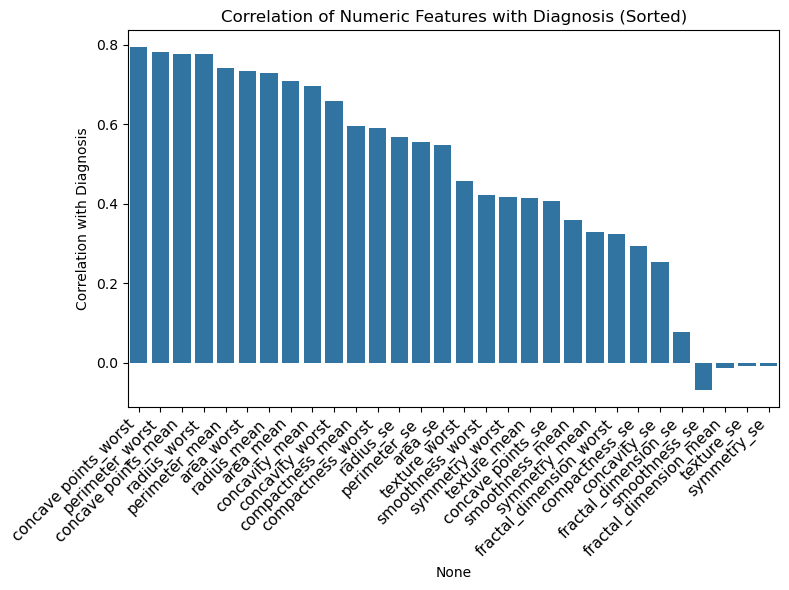

Columns with correlation below 0.05:


In [ ]:
numeric_df = df_modified.select_dtypes(include='number').drop(columns=['diagnosis'], errors='ignore')

target_corr = numeric_df.apply(lambda x: x.corr(df_modified['diagnosis']))

target_corr_df = pd.DataFrame(target_corr, columns=['correlation_with_diagnosis'])

print("Correlation of numeric features with diagnosis:")
print(target_corr_df)

target_corr_df = target_corr_df.reindex(target_corr_df['correlation_with_diagnosis'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr_df.index, y='correlation_with_diagnosis', data=target_corr_df)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Correlation with Diagnosis')
plt.title('Correlation of Numeric Features with Diagnosis (Sorted)')
plt.tight_layout()
plt.show()

# Remove from df_modified by correlation threshold
threshold = 0.05

# Assuming you have your correlation Series/DataFrame (like target_corr_df)
# Filter columns where absolute correlation is below the threshold
low_corr_cols = target_corr_df[ target_corr_df['correlation_with_diagnosis'].abs() < threshold ].index.tolist()

print(f"Columns with correlation below {threshold}:")

df_modified = df_modified.drop(columns=low_corr_cols)

Correlation of numeric features with diagnosis:
                         correlation_with_diagnosis
texture_mean                               0.415185
smoothness_mean                            0.358560
compactness_mean                           0.596534
concavity_mean                             0.696360
concave points_mean                        0.776614
symmetry_mean                              0.330499
perimeter_se                               0.556141
area_se                                    0.548236
smoothness_se                             -0.067016
compactness_se                             0.292999
concavity_se                               0.253730
concave points_se                          0.408042
fractal_dimension_se                       0.077972
texture_worst                              0.456903
area_worst                                 0.733825
smoothness_worst                           0.421465
compactness_worst                          0.590998
concavity_worst 

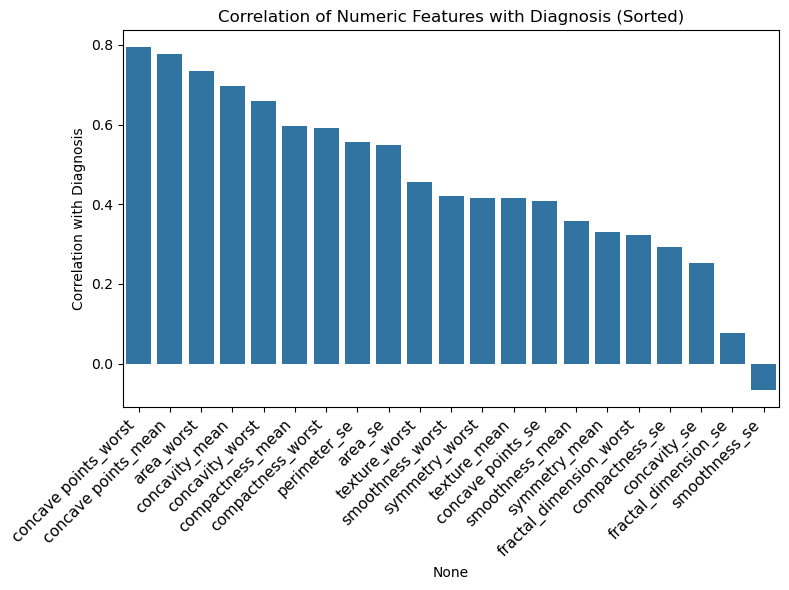

Columns with correlation below 0.05:


In [ ]:
# First we delete redundant features based on our correlation matrix
for col1, col2, in to_combine:
    if col1 in df_modified.columns and col2 in df_modified.columns:
        df_modified = df_modified.drop(columns=[col2])
    
df_modified.to_csv("data_modified.csv", index=False)

numeric_df = df_modified.select_dtypes(include='number').drop(columns=['diagnosis'], errors='ignore')

target_corr = numeric_df.apply(lambda x: x.corr(df_modified['diagnosis']))

target_corr_df = pd.DataFrame(target_corr, columns=['correlation_with_diagnosis'])

print("Correlation of numeric features with diagnosis:")
print(target_corr_df)

target_corr_df = target_corr_df.reindex(target_corr_df['correlation_with_diagnosis'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr_df.index, y='correlation_with_diagnosis', data=target_corr_df)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylabel('Correlation with Diagnosis')
plt.title('Correlation of Numeric Features with Diagnosis (Sorted)')
plt.tight_layout()
plt.show()

# Remove from df_modified by correlation threshold
threshold = 0.05

# Assuming you have your correlation Series/DataFrame (like target_corr_df)
# Filter columns where absolute correlation is below the threshold
low_corr_cols = target_corr_df[ target_corr_df['correlation_with_diagnosis'].abs() < threshold ].index.tolist()

print(f"Columns with correlation below {threshold}:")

# Now we want to combine features that we have found a high correlation before
# df_modified.to_csv("data_modified.csv", index=False)

Dimensionality Reduction
- Goal: remove dimensions -> Curse of dimensionality
- Remove redundancy and noise from the dataset
- Techniques:
    - Combining Features
    - Principal component analyis (PCA)
    - Factor analysis (FA)
    - Singular value decomposition (SVD)
    - Linear discriminant (LDA)

PCA in detail:
- Goal: Combine existing, correlated variables into less, independent variables
- Process:
    - Start with N dimensions in data set
    - Normalize Data
        - Min-Max (uniform distr.)
        - Z-score scaling (gaussian distr.)
        - Log transformation (skewness)
    - Calculate N principal components (PCs) from data set
        - Each PC explains a part of the variance ( → eigenvalue)
        - Each PC receives a contribution to each other ( → eigenvector)
    - Select the PCs with high eigenvalues; ignore the X remaining PCs
- Analyze loadings / eigenvalues of the PCs (Feature Loadings on PCs Heat Map)
- When to use PCAs:
    - Too many variables → Curse of Dimensionality
    - The features in the data are highly correlated → Multicollinearity
    - Visualization of high-dimensional data → Visualize relevant PCs
    - Noise reduction → Getting rid of low-variance components
    - In combination with clustering algorithms


Features to combine with PCA (correlation < 0.4):
['smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se', 'fractal_dimension_se', 'smoothness_se']


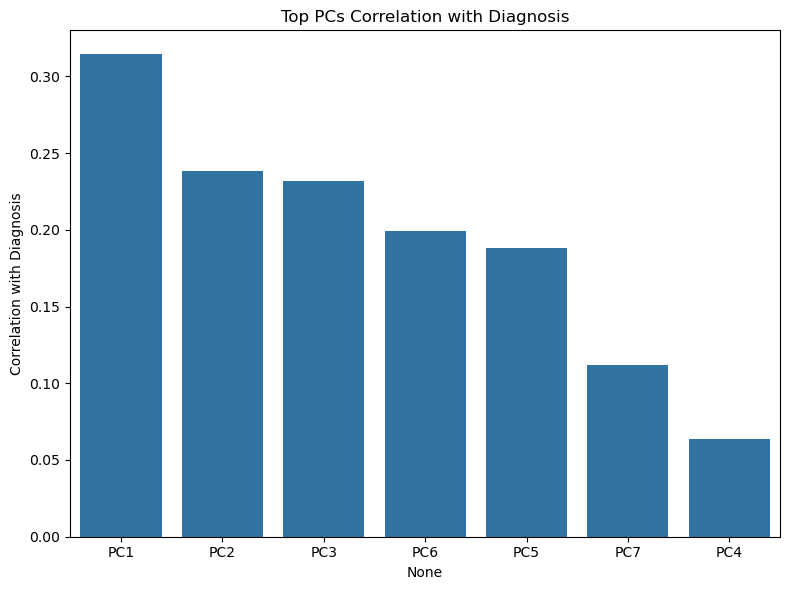

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

threshold_pca = 0.4
low_corr_features = target_corr_df[
    target_corr_df['correlation_with_diagnosis'].abs() < threshold_pca
].index.tolist()

print(f"Features to combine with PCA (correlation < {threshold_pca}):")
print(low_corr_features)

scaler = StandardScaler()
low_corr_data_scaled = scaler.fit_transform(df_modified[low_corr_features])

pca = PCA()
pcs = pca.fit_transform(low_corr_data_scaled)


pcs_df = pd.DataFrame(pcs, columns=[f'PC{i+1}' for i in range(pcs.shape[1])])

pcs_df['diagnosis'] = df_modified['diagnosis'].reset_index(drop=True)
pc_target_corr = pcs_df.drop(columns='diagnosis').apply(lambda x: x.corr(pcs_df['diagnosis']))

pc_target_corr_df = pd.DataFrame(pc_target_corr, columns=['correlation_with_diagnosis'])

sorted_corrs = pc_target_corr_df.abs().sort_values(by='correlation_with_diagnosis', ascending=False).head(7)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=sorted_corrs.index,
    y=sorted_corrs['correlation_with_diagnosis']
)
plt.ylabel('Correlation with Diagnosis')
plt.title(f'Top PCs Correlation with Diagnosis')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df_modified = df_modified.drop(columns=low_corr_features)
df_modified['PC1'] = pcs_df['PC1'].values

# Finally we also normalize the data
numeric_cols = df_modified.select_dtypes(include='number').columns.drop('diagnosis')
df_modified[numeric_cols] = scaler.fit_transform(df_modified[numeric_cols])

df_modified.to_csv("data_modified.csv", index=False)

Clustering (*would be an option, but not included in this notebook, as we only have numerical data. Tests with clustered data didn't perform better so we deleted it again*)
- K-Means
    - Evaluation: 
        - Sum of squared Errors (SSE)
        - Silhouette Score
    - Optimal number of clusters:
        - Elbow method

- Optional: Kohonen Self Organizing Maps Algorithm (SOM - run a clustering algorithm (e.g. K-Means) on the weight vectors of SOM)

Sampling
- Partition data in training (70% - 80%) and testing data (20% - 30%)
- Methods
    - k-fold cross validation:
        - partition data in k random samples
        - train model on k-1 of the subsamples
        - evaluate the k-1 models on the remaining testing subsample → error distribution indicates how stable the training is across data samples

    - bootstrapping:
        - From a dataset with N observations you sample N-times with replacement
        - some of the original observations are multiple times in the sampled data - others not at all
        - repeat a large number of times
        - used to sample training data


In [ ]:
# Sample Data (will be done again in modeling)
from sklearn.model_selection import KFold

# Define number of splits
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Features and target
X = df_modified.drop(columns='diagnosis')  # adjust if your target column is named differently
y = df_modified['diagnosis']

# Split using KFold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print(f"\nFold {fold}")
    print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")


Fold 1
Train size: 455, Test size: 114

Fold 2
Train size: 455, Test size: 114

Fold 3
Train size: 455, Test size: 114

Fold 4
Train size: 455, Test size: 114

Fold 5
Train size: 456, Test size: 113


## 3. Modeling


**Task**
- Describe two different models selected for analysis
- Describe how each model was implemented

- Taxanomic Overview
- Predictive Modeling vs. Descriptive Modeling

- **Predictive Modeling**
  - Goal: forecast future outcomes
  - Regression:
    - Linear Regression
    - Neural Networks
    - CART
  - Classification:
    - Logistic Regression
    - Nearest Neighbour
    - Boosting Algorithm

- **Descriptive Modeling**
  - Goal: understand data structure & find patterns
  - Segmentation:
    - Hierarchical Clustering
    - K-means
    - DBSCAN
  - Rule/Sequence Mining:
    - Apriori Algorithm
    - FP-growth
    - PrefixSpan

- Machine Learning task
  - Target function: f: Attributes → Class Labels L

- Data Partitioning strategy
  - training using labeled instances (“gold standard”)
  - split data into disjuncts sets of training data and test data

- Learning process
  - classifier learns from training data
  - performance assessment: evaluate classifier on separate test data (to avoid data leakage = classifier learns from training data)

- Problems
  - Limitation of training data
  - Mapping Challenges: Training Set ≠ Entire Population
  - Overfitting

- Local vs. global models
  - Local models
    - k-Nearest Neighbors (k-NN)
    - Focus: Local neighborhood structures
    - Distance based decision boundary
    - Uses nearby data points and distance-based decision boundaries for localized predictions
  - Global models
    - Linear/Logistic Regression; Neural Networks
    - Single, comprehensive decision boundary
    - Utilizes all data to create a unified decision rule for overall generalization

- Trade-Off
  - Interpretability vs Complexity
  - Computational Speed
  - Data Requirements

- Parametric vs. Non-Parametric Models
  - Parametric Models
    - Logistic Regression
    - Finite parameter set
    - Strong distributional assumptions
  - Non-Parametric Models
    - Decision Trees
    - Random Forests
    - Minimal data distribution assumptions

- Model Complexity Spectrum
  - “Easy” models → High interpretability
    - Linear Regression
    - Logistic Regression
    - Decision Trees
  - “Complex” models → Higher predictive accuracy
    - Random Forests
    - Gradient Boosting
    - Deep Neural Networks


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

def logistic_regression_cv(df_instance, name="Dataset"):
    print(f"\n########### Logistic Regression on {name} ###########")

    X = df_instance.drop(columns=["diagnosis"])
    y = df_instance["diagnosis"]

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    y_test_list, y_pred_list, y_score_list, accuracies, precisions, recalls, f1s = [], [], [], [], [], [], []

    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        print(f"\n--- Fold {fold} ---")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LogisticRegression(max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)
        y_test_list.append(y_test)
        y_pred_list.append(y_pred)
        y_score_list.append(model.predict_proba(X_test)[:, 1],)

        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1 Score:  {f1:.4f}")

    print("\n=== Cross-Validation Summary ===")
    print(f"Accuracy:  Mean={np.mean(accuracies):.4f}  Std={np.std(accuracies):.4f}")
    print(f"Precision: Mean={np.mean(precisions):.4f}  Std={np.std(precisions):.4f}")
    print(f"Recall:    Mean={np.mean(recalls):.4f}  Std={np.std(recalls):.4f}")
    print(f"F1 Score:  Mean={np.mean(f1s):.4f}  Std={np.std(f1s):.4f}")

    y_test_flat = np.concatenate(y_test_list)
    y_pred_flat = np.concatenate(y_pred_list)
    return {
        'y_test_list': y_test_list,
        'y_pred_list': y_pred_list,
        'y_score_list': y_score_list,
        'accuracy_mean': (np.mean(accuracies), np.std(accuracies)),
        'precision_mean': (np.mean(precisions), np.std(precisions)),
        'recall_mean': (np.mean(recalls), np.std(recalls)),
        'f1_mean': (np.mean(f1s), np.std(f1s)),
        'accuracy_total': accuracy_score(y_test_flat, y_pred_flat),
        'precision_total': precision_score(y_test_flat, y_pred_flat, zero_division=0),
        'recall_total': recall_score(y_test_flat, y_pred_flat, zero_division=0),
        'f1_total': f1_score(y_test_flat, y_pred_flat, zero_division=0),
        'confusion_matrix' : confusion_matrix(y_test_flat, y_pred_flat, labels=[0, 1]),
        'precision_recall' : precision_recall_curve(y_test_flat, y_pred_flat)
    }


# Run and compare
reg_metrics_modified = logistic_regression_cv(df_modified, name="df_modified")
reg_metrics_cleaned = logistic_regression_cv(df_cleaned, name="df_cleaned")

print("\n########### Comparison ###########")
print("Mean Results:")
for metric in ['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean']:
    mean_mod, std_mod = reg_metrics_modified[metric]
    mean_cln, std_cln = reg_metrics_cleaned[metric]
    print(f"{metric.capitalize()}:")
    print(f"  df_modified - Mean: {mean_mod:.4f}, Std: {std_mod:.4f}")
    print(f"  df_cleaned  - Mean: {mean_cln:.4f}, Std: {std_cln:.4f}")
    if mean_mod > mean_cln:
        print(f"  -> df_modified performs better in {metric}\n")
    elif mean_mod < mean_cln:
        print(f"  -> df_cleaned performs better in {metric}\n")
    else:
        print(f"  -> Both perform equally in {metric}\n")

print("Total Results:")
for metric in ['accuracy_total', 'precision_total', 'recall_total', 'f1_total']:
    total_mod = reg_metrics_modified[metric]
    total_clean = reg_metrics_cleaned[metric]
    print(f"{metric.capitalize()}:")
    print(f"  df_modified - Total: {total_mod:.4f}")
    print(f"  df_cleaned  - Total: {total_clean:.4f}")
    if total_mod > total_clean:
        print(f"  -> df_modified performs better in {metric}\n")
    elif total_mod < total_clean:
        print(f"  -> df_cleaned performs better in {metric}\n")
    else:
        print(f"  -> Both perform equally in {metric}\n")



########### Logistic Regression on df_modified ###########

--- Fold 1 ---
Accuracy:  0.9737
Precision: 0.9762
Recall:    0.9535
F1 Score:  0.9647

--- Fold 2 ---
Accuracy:  0.9737
Precision: 0.9474
Recall:    0.9730
F1 Score:  0.9600

--- Fold 3 ---
Accuracy:  0.9649
Precision: 1.0000
Recall:    0.9070
F1 Score:  0.9512

--- Fold 4 ---
Accuracy:  0.9825
Precision: 1.0000
Recall:    0.9535
F1 Score:  0.9762

--- Fold 5 ---
Accuracy:  0.9735
Precision: 1.0000
Recall:    0.9348
F1 Score:  0.9663

=== Cross-Validation Summary ===
Accuracy:  Mean=0.9736  Std=0.0055
Precision: Mean=0.9847  Std=0.0208
Recall:    Mean=0.9443  Std=0.0222
F1 Score:  Mean=0.9637  Std=0.0082

########### Logistic Regression on df_cleaned ###########

--- Fold 1 ---
Accuracy:  0.9825
Precision: 1.0000
Recall:    0.9535
F1 Score:  0.9762

--- Fold 2 ---
Accuracy:  0.9737
Precision: 0.9722
Recall:    0.9459
F1 Score:  0.9589

--- Fold 3 ---
Accuracy:  0.9649
Precision: 1.0000
Recall:    0.9070
F1 Score:  0.9512

--


########### SHAP Feature Importance for df_modified ###########


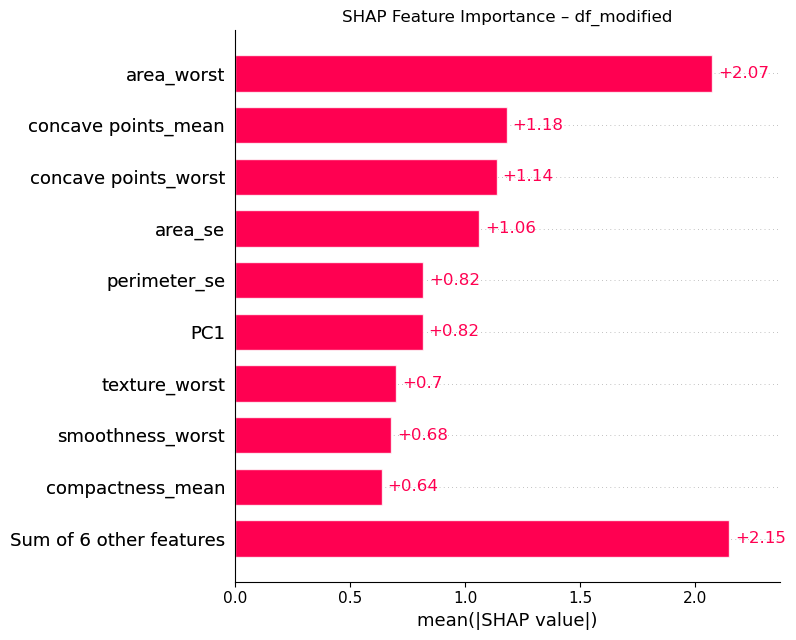

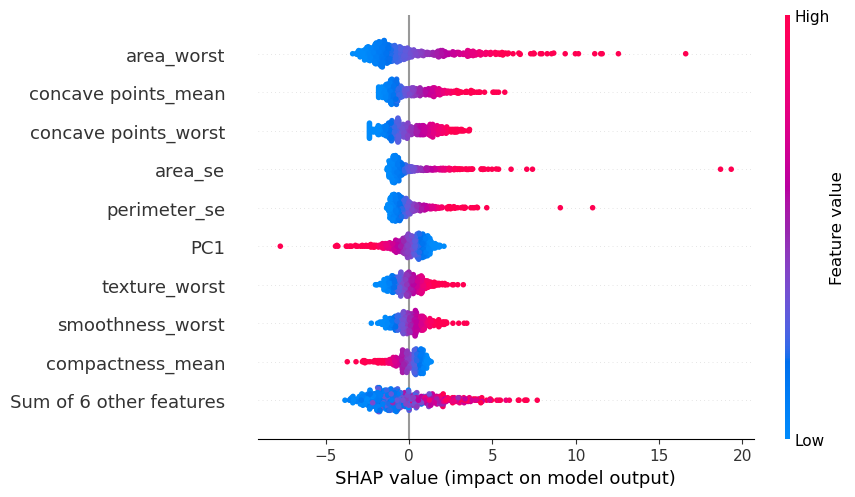


########### SHAP Feature Importance for df_cleaned ###########


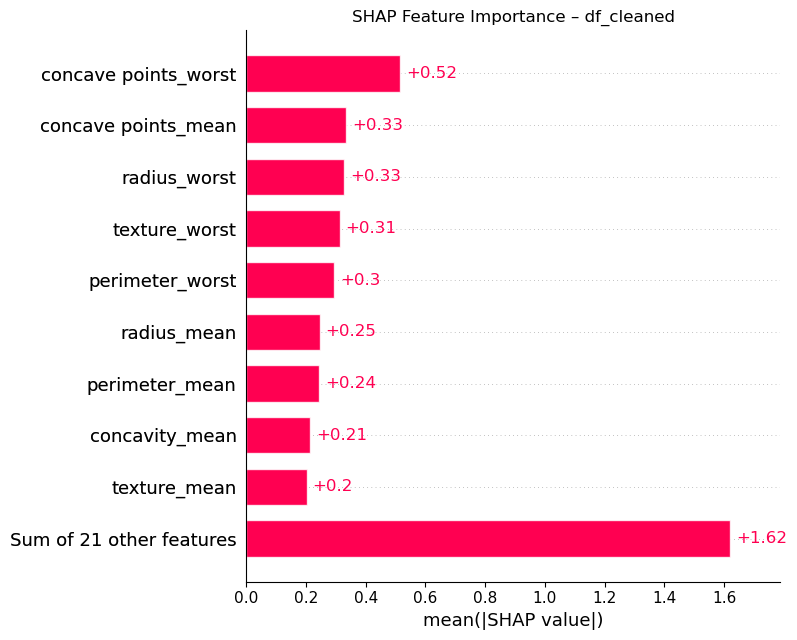

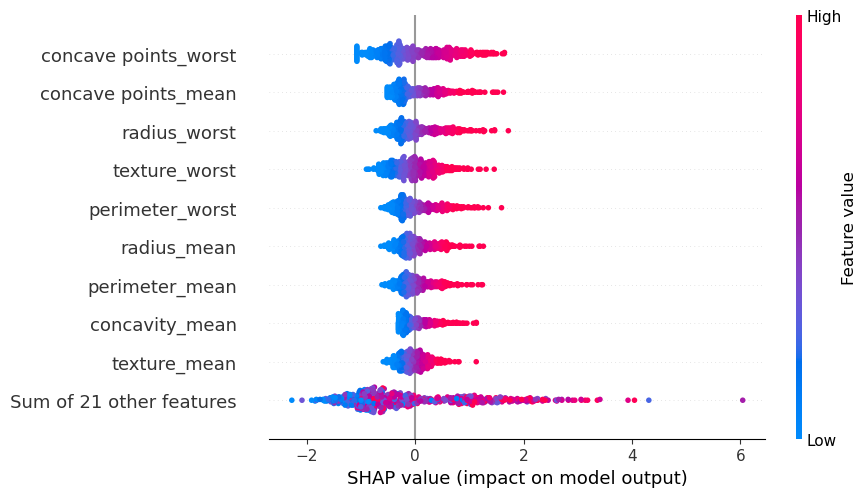

In [ ]:
import shap

def explain_logistic_regression_with_shap(df_instance, name="Dataset"):
    print(f"\n########### SHAP Feature Importance for {name} ###########")

    X = df_instance.drop(columns=["diagnosis"])
    y = df_instance["diagnosis"]

    # Trainiere finales Modell auf allen Daten
    model = LogisticRegression(max_iter=1000)
    model.fit(X, y)

    # SHAP Explainer erstellen
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    # Plot 1: Barplot – Wichtigkeit
    shap.plots.bar(shap_values, show=False)
    plt.title(f"SHAP Feature Importance – {name}")
    plt.tight_layout()
    plt.show()

    # Plot 2 (optional): Dot-Plot – Wirkung + Richtung
    shap.plots.beeswarm(shap_values, max_display=10)  # nur Top 10 Features

# SHAP-Feature-Importance analysieren
explain_logistic_regression_with_shap(df_modified, name="df_modified")
explain_logistic_regression_with_shap(df_cleaned, name="df_cleaned")



########### Random Forest on df_modified ###########

--- Fold 1 ---
Accuracy:  0.9912
Precision: 0.9773
Recall:    1.0000
F1 Score:  0.9885

--- Fold 2 ---
Accuracy:  0.9386
Precision: 0.9500
Recall:    0.8837
F1 Score:  0.9157

--- Fold 3 ---
Accuracy:  0.9649
Precision: 1.0000
Recall:    0.9048
F1 Score:  0.9500

--- Fold 4 ---
Accuracy:  0.9474
Precision: 0.8913
Recall:    0.9762
F1 Score:  0.9318

--- Fold 5 ---
Accuracy:  0.9735
Precision: 0.9756
Recall:    0.9524
F1 Score:  0.9639

=== Cross-Validation Summary ===
Mean Accuracy:  0.9631 ± 0.0187
Mean Precision: 0.9588 ± 0.0373
Mean Recall:    0.9434 ± 0.0434
Mean F1 Score:  0.9500 ± 0.0252

--- Feature Importance für df_modified ---
area_worst              0.213305
concave points_worst    0.204888
concave points_mean     0.132660
concavity_mean          0.091210
area_se                 0.085062
concavity_worst         0.070806
compactness_mean        0.035304
perimeter_se            0.034247
texture_worst           0.027769
com

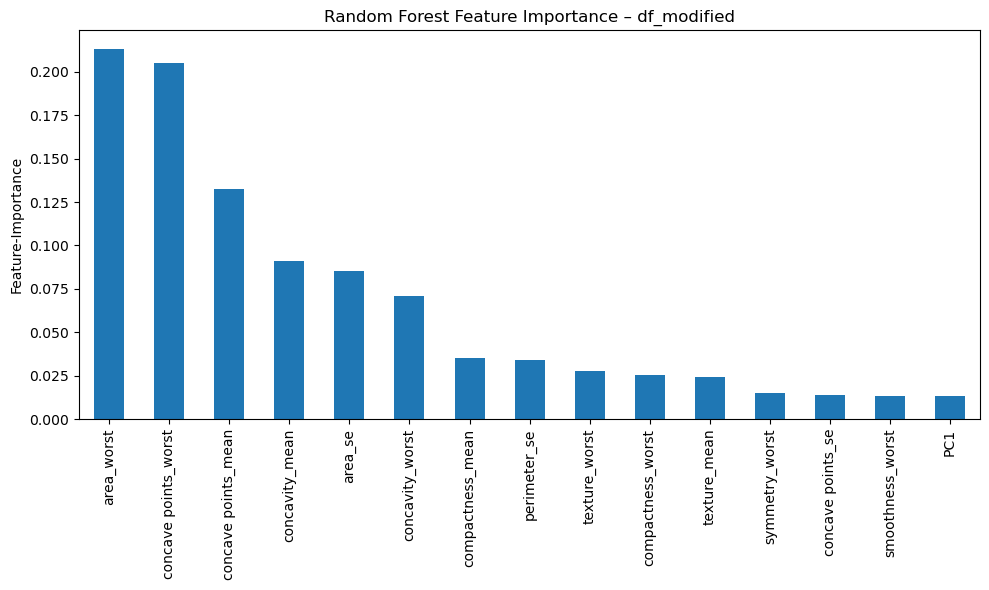

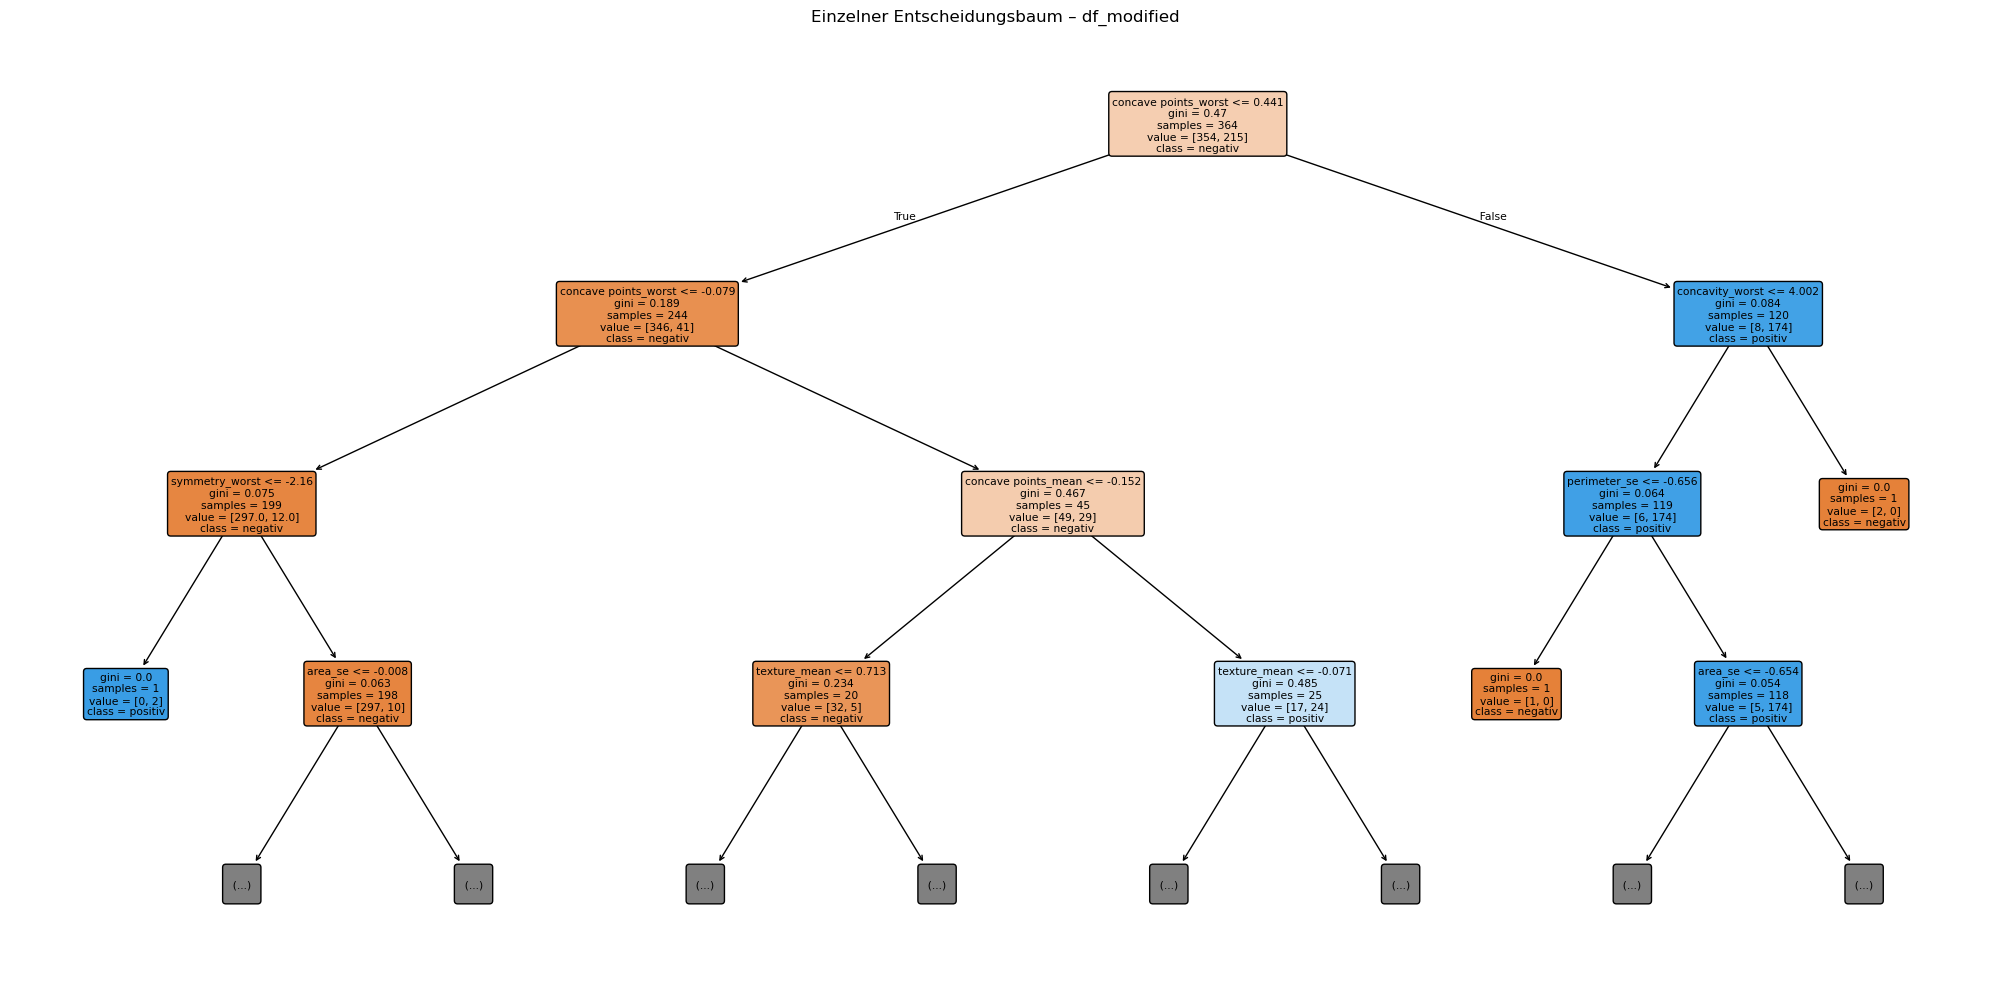


########### Random Forest on df_cleaned ###########

--- Fold 1 ---
Accuracy:  0.9649
Precision: 0.9333
Recall:    0.9767
F1 Score:  0.9545

--- Fold 2 ---
Accuracy:  0.9386
Precision: 0.9737
Recall:    0.8605
F1 Score:  0.9136

--- Fold 3 ---
Accuracy:  0.9474
Precision: 0.9737
Recall:    0.8810
F1 Score:  0.9250

--- Fold 4 ---
Accuracy:  0.9474
Precision: 0.8750
Recall:    1.0000
F1 Score:  0.9333

--- Fold 5 ---
Accuracy:  0.9735
Precision: 0.9756
Recall:    0.9524
F1 Score:  0.9639

=== Cross-Validation Summary ===
Mean Accuracy:  0.9543 ± 0.0128
Mean Precision: 0.9463 ± 0.0390
Mean Recall:    0.9341 ± 0.0543
Mean F1 Score:  0.9381 ± 0.0186

--- Feature Importance für df_cleaned ---
area_worst                 0.139357
concave points_worst       0.132225
concave points_mean        0.107046
radius_worst               0.082848
perimeter_worst            0.080850
perimeter_mean             0.067990
concavity_mean             0.066917
area_mean                  0.060462
concavity_wors

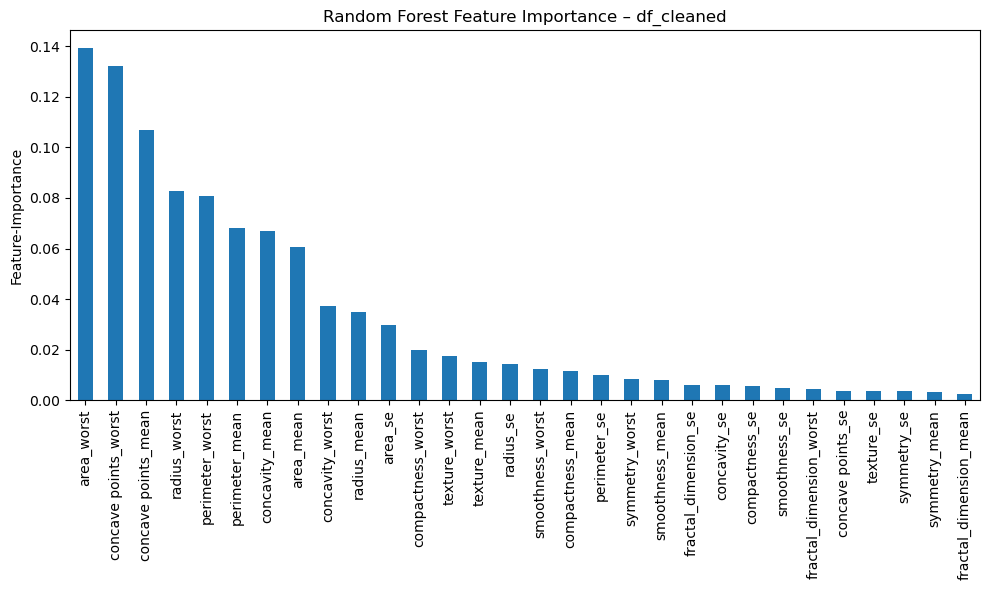

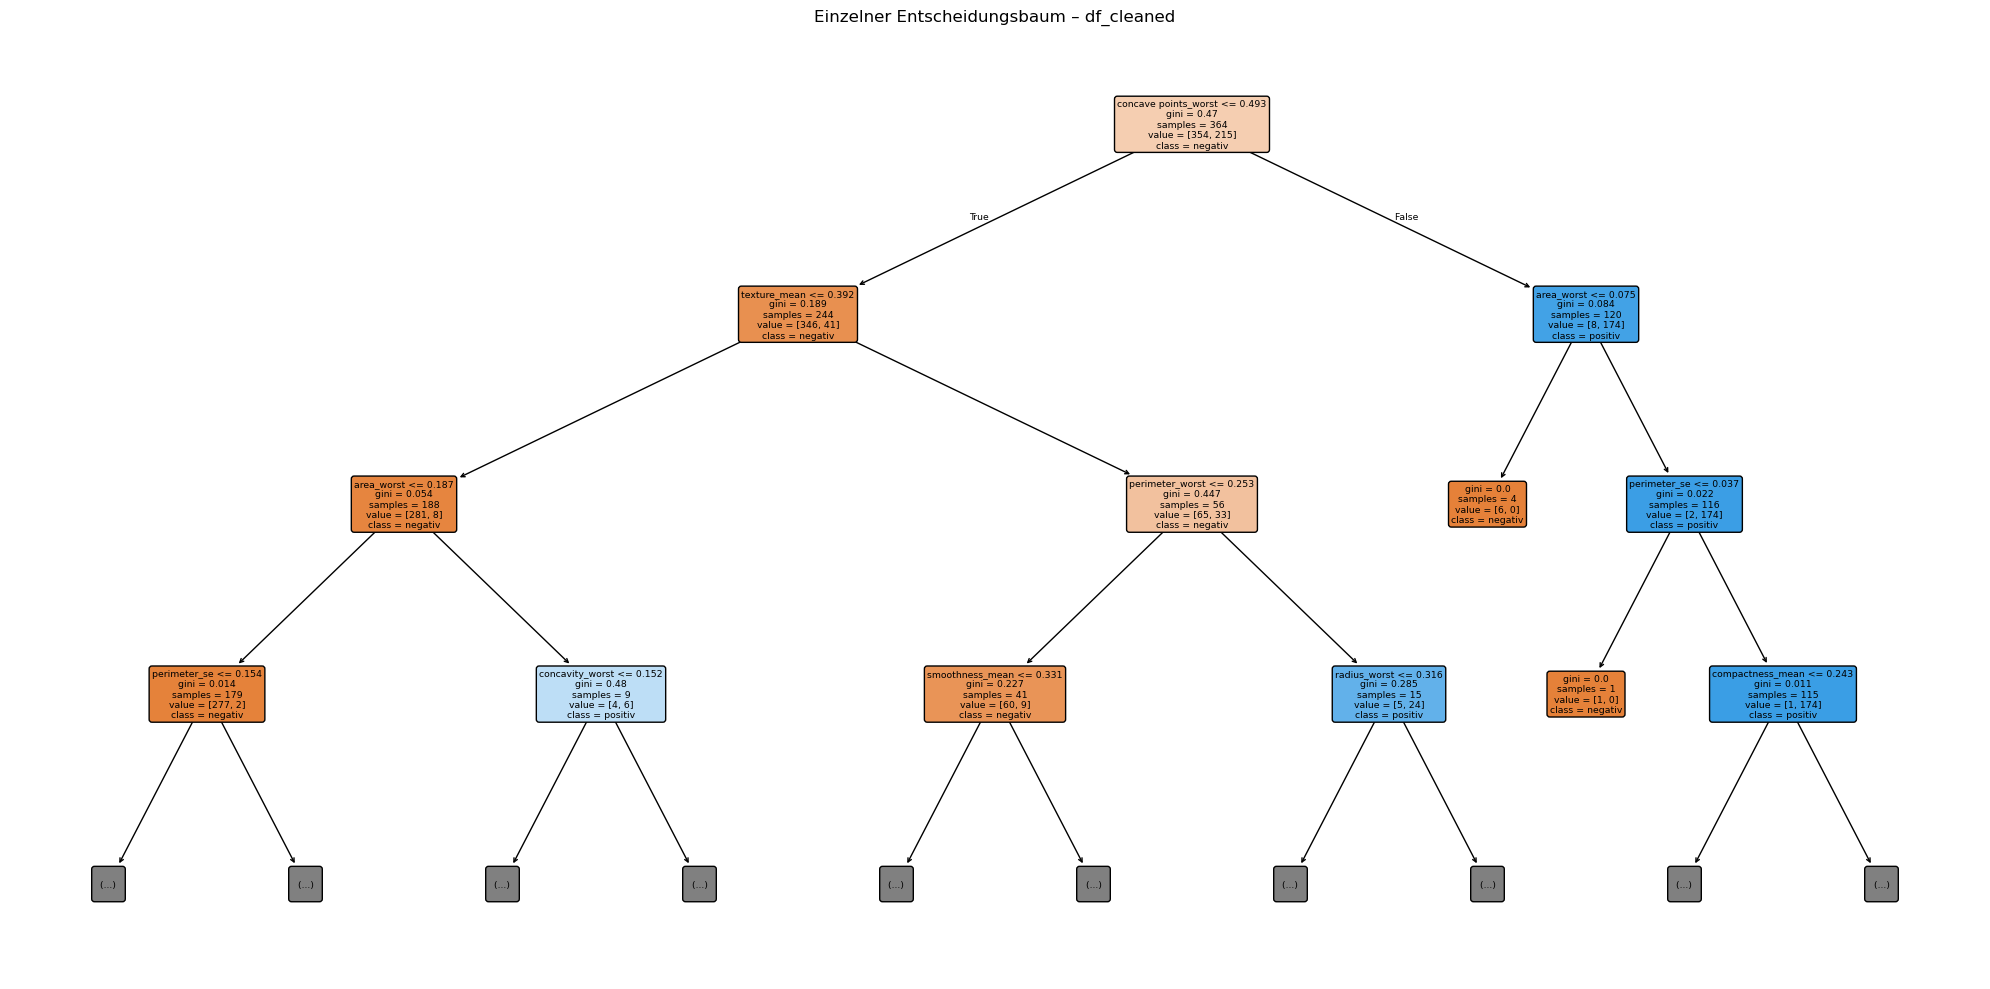


########### Comparison ###########
Mean Results:
Accuracy_mean:
  df_modified - Mean: 0.9631, Std: 0.0187
  df_cleaned  - Mean: 0.9543, Std: 0.0128
  -> df_modified performs better in accuracy_mean

Precision_mean:
  df_modified - Mean: 0.9588, Std: 0.0373
  df_cleaned  - Mean: 0.9463, Std: 0.0390
  -> df_modified performs better in precision_mean

Recall_mean:
  df_modified - Mean: 0.9434, Std: 0.0434
  df_cleaned  - Mean: 0.9341, Std: 0.0543
  -> df_modified performs better in recall_mean

F1_mean:
  df_modified - Mean: 0.9500, Std: 0.0252
  df_cleaned  - Mean: 0.9381, Std: 0.0186
  -> df_modified performs better in f1_mean

Total Results:
Accuracy_total:
  df_modified - Total: 0.9631
  df_cleaned  - Total: 0.9543
  -> df_modified performs better in accuracy_total

Precision_total:
  df_modified - Total: 0.9569
  df_cleaned  - Total: 0.9429
  -> df_modified performs better in precision_total

Recall_total:
  df_modified - Total: 0.9434
  df_cleaned  - Total: 0.9340
  -> df_modified 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

def plot_feature_importance(model, feature_names, name="Dataset"):
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

    print(f"\n--- Feature Importance für {name} ---")
    print(feat_imp)

    plt.figure(figsize=(10, 6))
    feat_imp.plot(kind='bar')
    plt.title(f"Random Forest Feature Importance – {name}")
    plt.ylabel("Feature-Importance")
    plt.tight_layout()
    plt.show()

def plot_single_tree(model, feature_names, name="Dataset"):
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[0],
              feature_names=feature_names,
              class_names=["negativ", "positiv"],
              filled=True,
              rounded=True,
              max_depth=3)
    plt.title(f"Einzelner Entscheidungsbaum – {name}")
    plt.tight_layout()
    plt.show()

def random_forest(df_instance, name="Dataset"):
    print(f"\n########### Random Forest on {name} ###########")

    X = df_instance.drop(columns='diagnosis')
    y = df_instance['diagnosis']

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    y_test_list, y_pred_list, y_score_list, accuracies, precisions, recalls, f1s = [], [], [], [], [], [], []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"\n--- Fold {fold} ---")
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)

        y_test_list.append(y_test)
        y_pred_list.append(y_pred)
        y_score_list.append(rf.predict_proba(X_test)[:, 1])

        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1 Score:  {f1:.4f}")

    print("\n=== Cross-Validation Summary ===")
    print(f"Mean Accuracy:  {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"Mean Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
    print(f"Mean Recall:    {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
    print(f"Mean F1 Score:  {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

    # Finales Modell für Feature Importance und Baumdarstellung
    final_model = RandomForestClassifier(n_estimators=100, random_state=42)
    final_model.fit(X, y)

    # Plots anzeigen
    plot_feature_importance(final_model, X.columns, name)
    plot_single_tree(final_model, X.columns, name)

    y_test_flat = np.concatenate(y_test_list)
    y_pred_flat = np.concatenate(y_pred_list)

    return {
        'y_test_list': y_test_list,
        'y_pred_list': y_pred_list,
        'y_score_list': y_score_list,
        'accuracy_mean': (np.mean(accuracies), np.std(accuracies)),
        'precision_mean': (np.mean(precisions), np.std(precisions)),
        'recall_mean': (np.mean(recalls), np.std(recalls)),
        'f1_mean': (np.mean(f1s), np.std(f1s)),
        'accuracy_total': accuracy_score(y_test_flat, y_pred_flat),
        'precision_total': precision_score(y_test_flat, y_pred_flat, zero_division=0),
        'recall_total': recall_score(y_test_flat, y_pred_flat, zero_division=0),
        'f1_total': f1_score(y_test_flat, y_pred_flat, zero_division=0),
        'confusion_matrix' : confusion_matrix(y_test_flat, y_pred_flat, labels=[0, 1])
    }

# Run for both datasets
forest_metrics_modified = random_forest(df_modified, name="df_modified")
forest_metrics_cleaned = random_forest(df_cleaned, name="df_cleaned")

print("\n########### Comparison ###########")
print("Mean Results:")
for metric in ['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean']:
    mean_mod, std_mod = forest_metrics_modified[metric]
    mean_cln, std_cln = forest_metrics_cleaned[metric]
    print(f"{metric.capitalize()}:")
    print(f"  df_modified - Mean: {mean_mod:.4f}, Std: {std_mod:.4f}")
    print(f"  df_cleaned  - Mean: {mean_cln:.4f}, Std: {std_cln:.4f}")
    if mean_mod > mean_cln:
        print(f"  -> df_modified performs better in {metric}\n")
    elif mean_mod < mean_cln:
        print(f"  -> df_cleaned performs better in {metric}\n")
    else:
        print(f"  -> Both perform equally in {metric}\n")

print("Total Results:")
for metric in ['accuracy_total', 'precision_total', 'recall_total', 'f1_total']:
    total_mod = forest_metrics_modified[metric]
    total_clean = forest_metrics_cleaned[metric]
    print(f"{metric.capitalize()}:")
    print(f"  df_modified - Total: {total_mod:.4f}")
    print(f"  df_cleaned  - Total: {total_clean:.4f}")
    if total_mod > total_clean:
        print(f"  -> df_modified performs better in {metric}\n")
    elif total_mod < total_clean:
        print(f"  -> df_cleaned performs better in {metric}\n")
    else:
        print(f"  -> Both perform equally in {metric}\n")


## 4. Evaluation

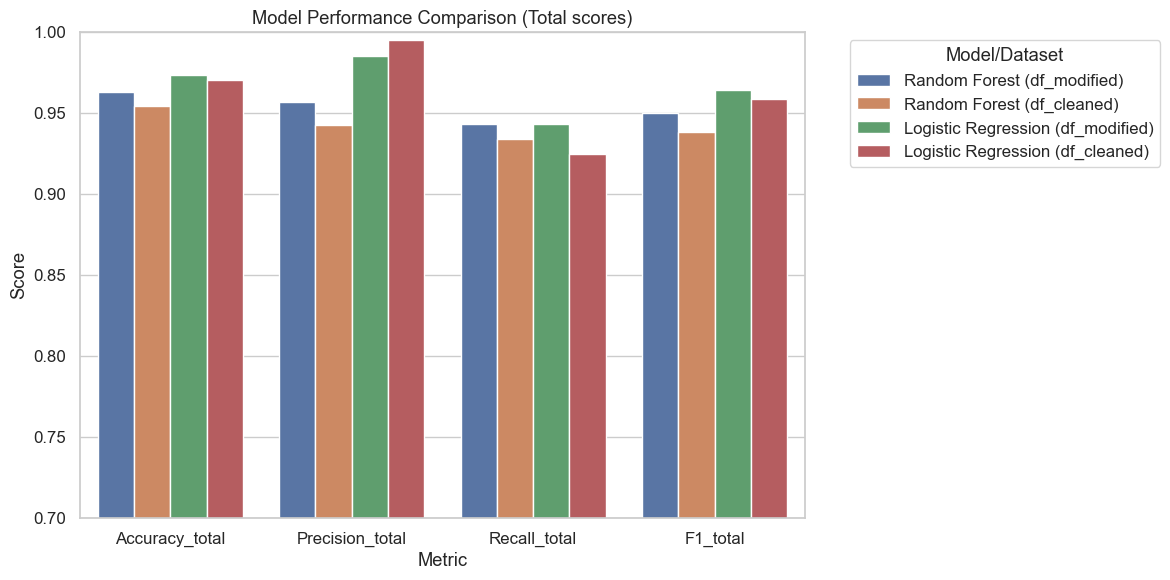

In [ ]:
results = {
    'Random Forest (df_modified)': forest_metrics_modified,
    'Random Forest (df_cleaned)': forest_metrics_cleaned,
    'Logistic Regression (df_modified)': reg_metrics_modified,
    'Logistic Regression (df_cleaned)': reg_metrics_cleaned,
}

# Convert to DataFrame for easy plotting
rows = []
for label, metrics in results.items():
    for metric in ['accuracy_total', 'precision_total', 'recall_total', 'f1_total']:
        total = metrics[metric]
        rows.append({
            'Model/Dataset': label,
            'Metric': metric.capitalize(),
            'Total': total
        })

df_plot = pd.DataFrame(rows)

# Plot
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x='Metric', y='Total', hue='Model/Dataset', errorbar=None)

plt.title("Model Performance Comparison (Total scores)")
plt.ylabel("Score")
plt.ylim(0.7, 1.0)
plt.legend(title="Model/Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Task**
- Present evaluation metrics for both models
- Compare model performance and explain results


Evaluation Strategies:
- Confusion Matrix
    - Accuracy: Overall correctness of the model
    - Precision (Positive Predictive Value): How many predicted positives are actually positive
    - Recall (Sensitivity, True Positive Rate): How many actual positives were correctly predicted
    - Specificity (True Negative Rate): How many actual negatives were correctly predicted
    - F1 Score: Harmonic mean of precision and recall (balance between the two)

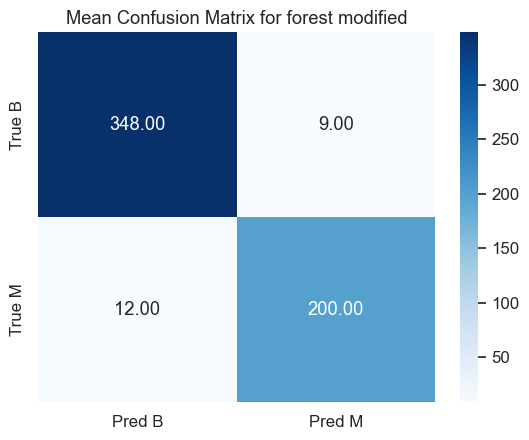

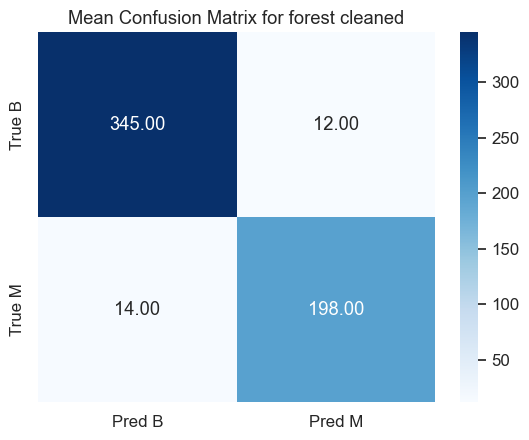

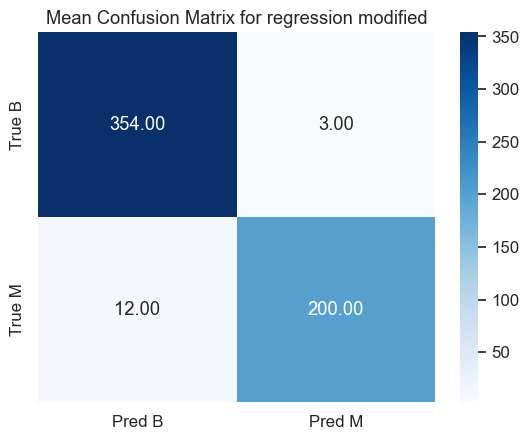

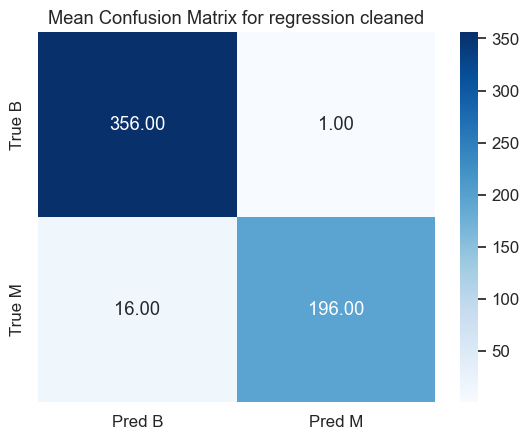

In [ ]:
# Confusion Matrix Easy model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def create_heatmap(confusion_matrix, title):
    sns.heatmap(confusion_matrix, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Pred B','Pred M'],
                yticklabels=['True B','True M'])
    plt.title(f"Total Confusion Matrix for {title}")
    plt.show()
    
create_heatmap(confusion_matrix=forest_metrics_modified['confusion_matrix'], title="forest modified")
create_heatmap(confusion_matrix=forest_metrics_cleaned['confusion_matrix'], title="forest cleaned")
create_heatmap(confusion_matrix=reg_metrics_modified['confusion_matrix'], title="regression modified")
create_heatmap(confusion_matrix=reg_metrics_cleaned['confusion_matrix'], title="regression cleaned")

- Precision-Recall (PR) Curve
  - The PR curve plots Precision (y-axis) vs. Recall (x-axis) at different thresholds
  - Focuses on performance in imbalanced datasets, where the positive class is rare

- Area Under the PR Curve (AUC-PR)
  - Measures the average trade-off between precision and recall
  - Value range: 0 to 1 → Higher = Better
  - More informative than ROC AUC for imbalanced classes, since it doesn’t account for true negatives

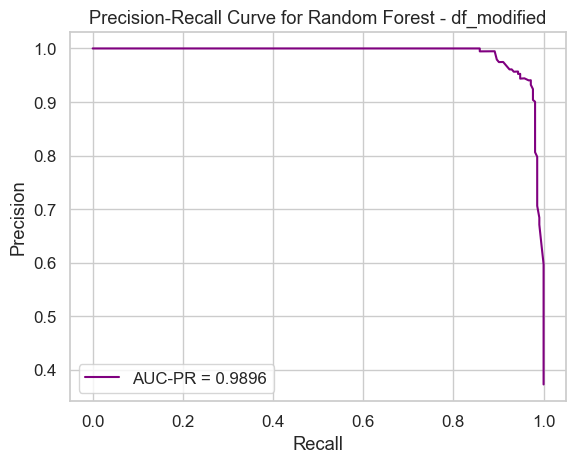

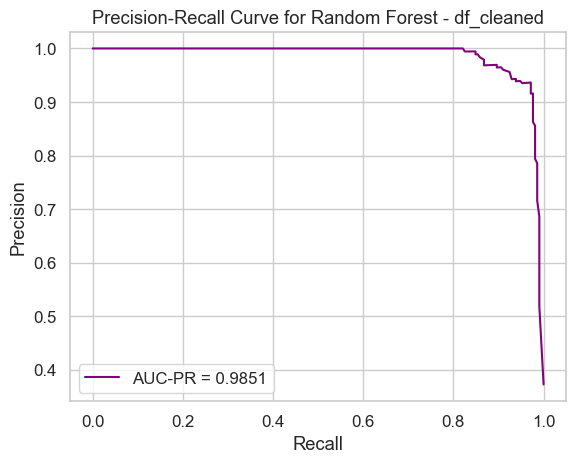

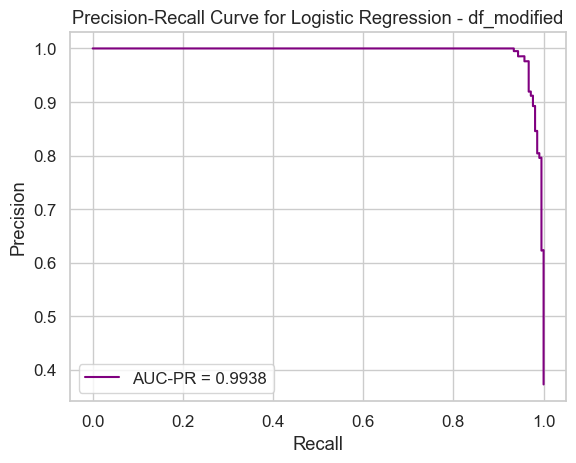

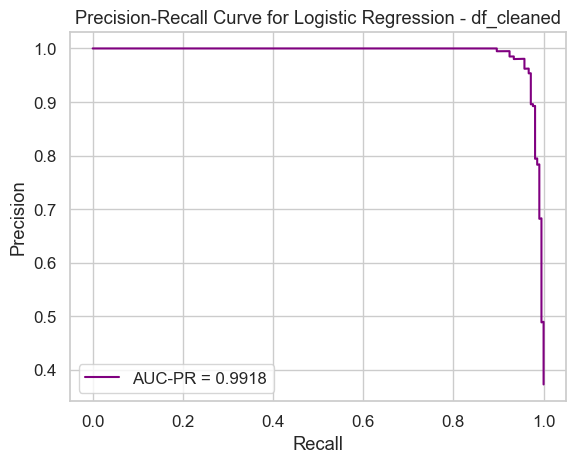

In [ ]:
# PR & AUC-PR easy model
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_precision_recall(y_test, y_score, title):
    
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    auc_pr = average_precision_score(y_test, y_score)

    plt.figure()
    plt.plot(recall, precision, color='purple', label=f'AUC-PR = {auc_pr:.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {title}')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

plot_precision_recall(
    y_test=np.concatenate(forest_metrics_modified['y_test_list']),
    y_score=np.concatenate(forest_metrics_modified['y_score_list']),
    title='Random Forest - df_modified'
)

plot_precision_recall(
    y_test=np.concatenate(forest_metrics_cleaned['y_test_list']),
    y_score=np.concatenate(forest_metrics_cleaned['y_score_list']),
    title='Random Forest - df_cleaned'
)

plot_precision_recall(
    y_test=np.concatenate(reg_metrics_modified['y_test_list']),
    y_score=np.concatenate(reg_metrics_modified['y_score_list']),
    title='Logistic Regression - df_modified'
)

plot_precision_recall(
    y_test=np.concatenate(reg_metrics_cleaned['y_test_list']),
    y_score=np.concatenate(reg_metrics_cleaned['y_score_list']),
    title='Logistic Regression - df_cleaned'
)



- ROC Curve (Receiver Operating Characteristic)
  - Plots True Positive Rate (Recall) vs. False Positive Rate (FPR)
  - Shows model performance across all classification thresholds
  - Each point on the curve corresponds to a different threshold

- Area Under the ROC Curve (AUC-ROC)
  - AUC = Area under the ROC Curve (value between 0 and 1)
  - Measures the model’s ability to distinguish between classes
  - Interpretation:
    - 1.0 = perfect classifier
    - 0.5 = random guessing
    - < 0.5 = worse than random

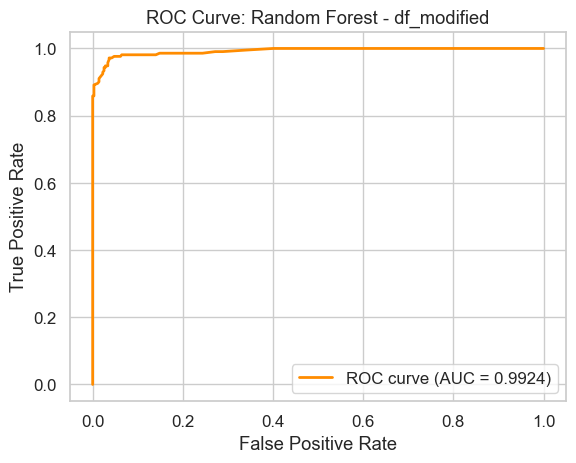

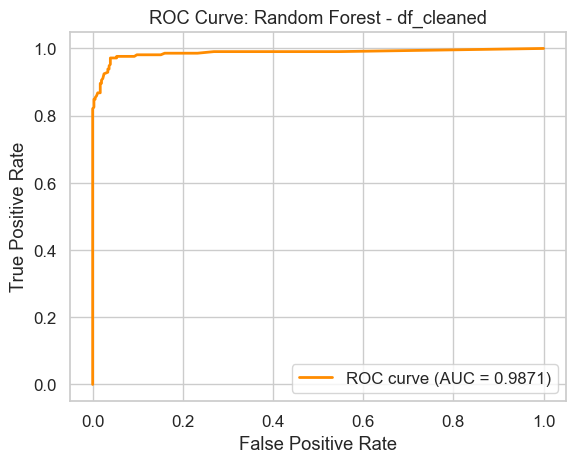

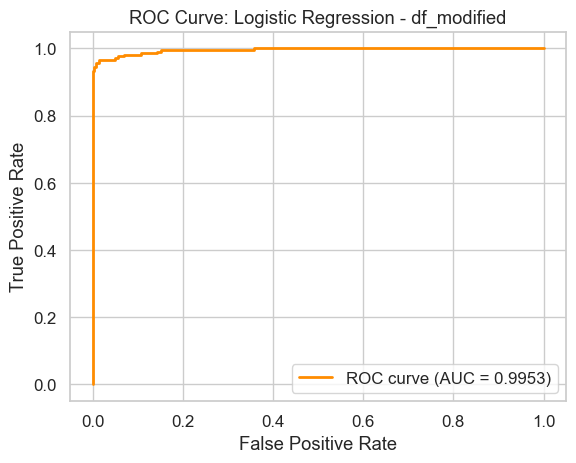

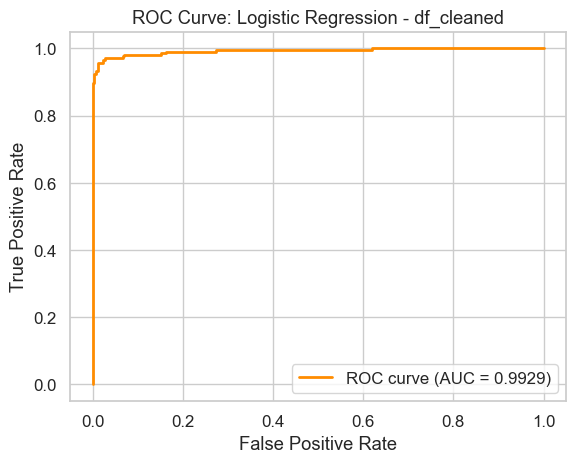

In [ ]:
# ROC & AUC ROC
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(y_test, y_score, title):
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {title}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


plot_roc_curve(
    y_test=np.concatenate(forest_metrics_modified['y_test_list']),
    y_score=np.concatenate(forest_metrics_modified['y_score_list']),
    title='Random Forest - df_modified'
)

plot_roc_curve(
    y_test=np.concatenate(forest_metrics_cleaned['y_test_list']),
    y_score=np.concatenate(forest_metrics_cleaned['y_score_list']),
    title='Random Forest - df_cleaned'
)

plot_roc_curve(
    y_test=np.concatenate(reg_metrics_modified['y_test_list']),
    y_score=np.concatenate(reg_metrics_modified['y_score_list']),
    title='Logistic Regression - df_modified'
)

plot_roc_curve(
    y_test=np.concatenate(reg_metrics_cleaned['y_test_list']),
    y_score=np.concatenate(reg_metrics_cleaned['y_score_list']),
    title='Logistic Regression - df_cleaned'
)